# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (11)

**21/11/2022**

## Aplicar un caso de uso (*Regresión*)

In [1]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### **1- Análisis y filtrado de datos**

### Dataset: [**California Housing**](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)

Este conjunto de datos se ha obtenido desde el repositorio de [StatLib](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html) y está disponible en los recursos de la librería *scikit-learn*. Se puede descargar utilizando la función *sklearn.datasets.fetch_california_housing()*.

La variable objetivo es **el valor medio de la vivienda para los distritos de *California***, expresado en cientos de miles de dólares (*100,000 $*).

Este conjunto de datos se derivó del censo estadounidense de 1990, utilizando **una fila por grupo de bloques de censo**. Un grupo de bloques es la unidad geográfica más pequeña para la cual la ***Oficina del Censo de EE. UU.*** publica datos de muestra (un grupo de bloques generalmente tiene una población entre 600 y 3,000 personas).

Una vivienda o un hogar es un grupo de personas que residen dentro de una casa. Dado que se proporcionan el número promedio de habitaciones y dormitorios en este conjunto de datos por hogar, estas columnas pueden tomar valores sorprendentemente grandes para grupos de bloques con pocos hogares y muchas casas vacías, como resorts turísticas y vacacionales.

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

# Convertir los datos en pandas dataframe
dataframe_x = pd.DataFrame(california.data, columns = california.feature_names)

# La variable dependiente es el target y la llamammos dataframe_y
dataframe_y = pd.DataFrame(california.target, columns = ['target'])

# Combinamos ambos para obtener un dataframe con todas las variables explicativas y la variable objetivo
df_california = dataframe_x.join(dataframe_y)

df_california

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
0        -122.23   4.526  
1        -122.22   3.585  
2        -122.24   3.521  
3        -122.25   3.413  
4        -122.25   3.422  
...          ...     ...  
20635    -121.09   0.781  
20636    -121.21   0.771  
20637    -121.22   0.923  
20638    -121.32   0.847  
20639    -121.24   0.894  

[20640 rows x 9 columns]

Las variables que componen este dataset son:

- **MedInc**: Ingresos medios en el grupo de bloques.  

- **HouseAge**: Media de la antigüedad de las casas en el grupo de bloques.  

- **AveRooms**: Número promedio de habitaciones/cuartos por hogar.  

- **AveBedrms**: Número promedio de dormitorios por hogar.  

- **Population**: Población del grupo de bloques.  

- **AveOccup**: Número promedio de miembros del hogar.  

- **Latitude**: Latitud del grupo de bloques.  

- **Longitude**: Longitud del grupo de bloques. 

In [ ]:
# Información del Dataframe descargado
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# Consultamos las principales estadísticas del conjunto de datos
df_california.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

La información del Dtaframe indica que no hay valores perdido. Aún así lo podemos comprobar a nivel de cada columna para asegurarnos:

In [ ]:
df_california.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

Echamos un vistazo a la distribución de cada variable mediante diagrama de cajas.

<AxesSubplot:>

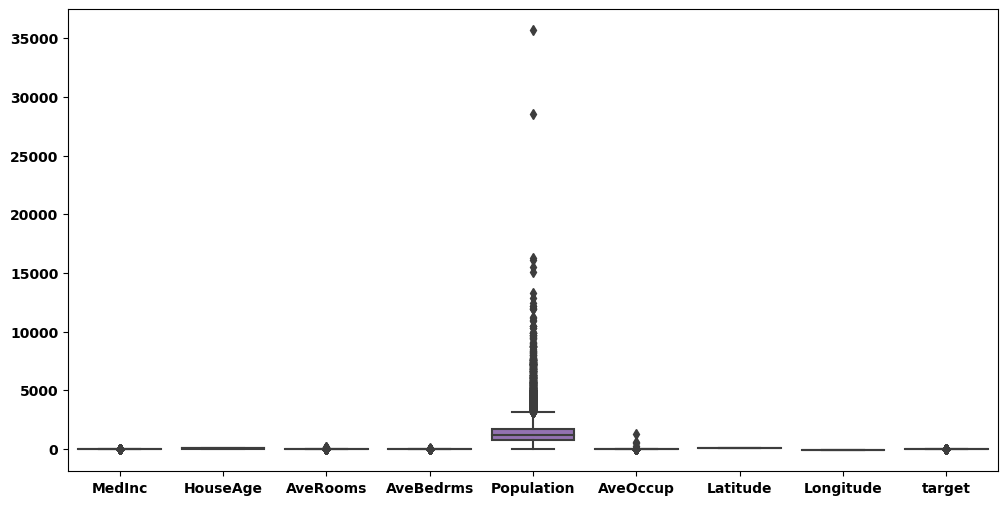

In [ ]:
sns.boxplot(data=df_california,  orient='v')

Lo primero que podemos observar son los **valores muy diversos** que puede tomar la variable ***Population***

<AxesSubplot:xlabel='Population', ylabel='Count'>

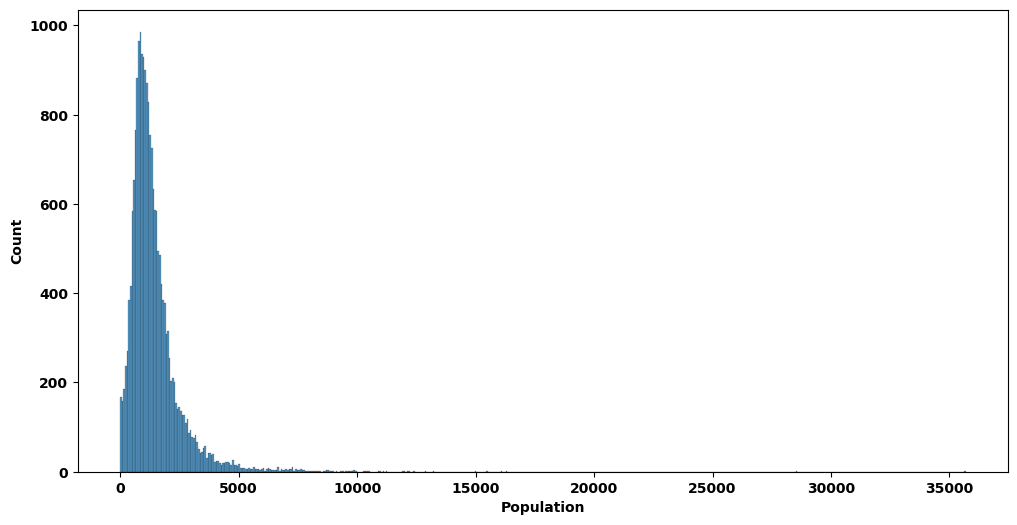

In [ ]:
# Visualizamos la distribución de los valores mediante el histograma
sns.histplot(df_california['Population'])

<AxesSubplot:>

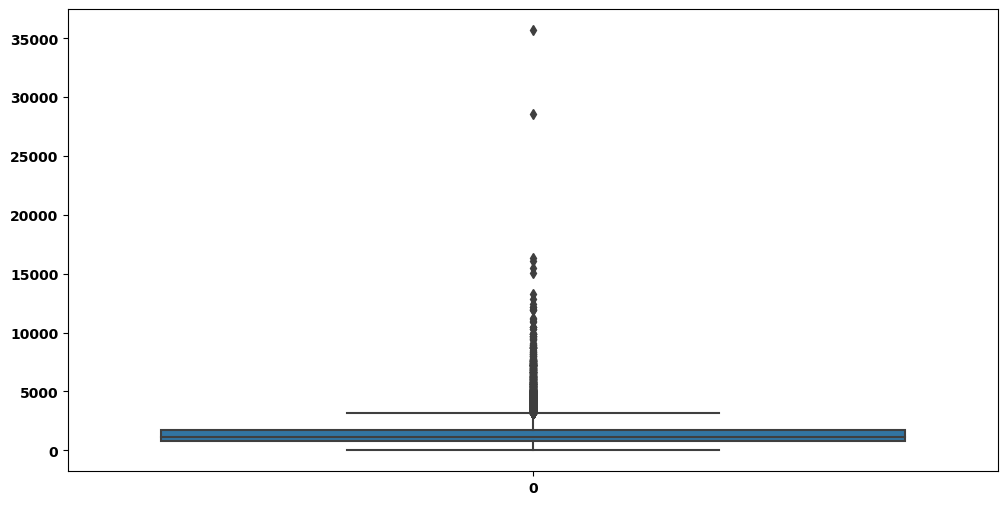

In [ ]:
# Visualizamos el diagrama de caja para marcar los cuartiles y detectar los valores atípicos
sns.boxplot(data=df_california['Population'],  orient='v')

Además de contener valores que toman un rango amplio, se puede observar que existen una serie de **valores muy lejos de la distribución principal que elevan considerablemente la dispersión** de esta variable.  

Filtramos primero los valores que se consideran **atípicos (outliers) en la representación de *boxplot* según la distancia intercuartil**.

In [ ]:
# Filtrar los valores atípicos basado en el rango intercuartil
Q1 = df_california['Population'].quantile(0.25)
Q3 = df_california['Population'].quantile(0.75)

# IQR es el rango intercuartil 
IQR = Q3 - Q1    

# Limites permitidos para los datos
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 *IQR

# Crear la máscara
filtro_oulier = (df_california['Population'] < lim_inf) | (df_california['Population'] > lim_sup)

# Filtramos el dataset aplicando la máscara
df_pop_out = df_california[filtro_oulier] 
df_pop_out

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
95     2.0096      36.0  2.294016   1.066294      3469.0  1.493328     37.80   
185    2.1917      43.0  4.844029   1.091795      4367.0  3.547522     37.79   
283    5.9849      22.0  6.528724   1.041179      4985.0  2.534316     37.79   
460    1.4012      52.0  3.105714   1.060000      3337.0  9.534286     37.87   
485    1.6307      35.0  2.962687   1.001148      3276.0  1.880597     37.86   
...       ...       ...       ...        ...         ...       ...       ...   
20543  1.7311      33.0  3.882852   1.029994      3717.0  2.103565     38.55   
20544  2.0650      23.0  4.803493   1.013646      6330.0  3.455240     38.55   
20563  3.1250       9.0  5.148007   1.119593      6837.0  2.899491     38.67   
20604  2.3496      17.0  4.551392   0.962527      3265.0  3.495717     39.12   
20629  2.0943      28.0  5.519802   1.020902      6912.0  3.801980     39.12   

       Longitude  target  
95       -122.26   1.300  
185      -122.23   1.128  
283      -122.16   3.710  
460      -122.26   1.750  
485      -122.26   2.536  
...          ...     ...  
20543    -121.74   1.826  
20544    -121.76   2.194  
20563    -121.75   1.325  
20604    -121.54   0.650  
20629    -121.39   1.083  

[1196 rows x 9 columns]

In [ ]:
# Calculamos el porcentaje que componen estos valores respecto a la totalidad de los datos
df_pop_out.shape[0]/df_california.shape[0] * 100

5.794573643410852

Se puede ver que estos datos **componen más de 5% de todos los registros que tenemos disponible** en el dataset original. Esto aumenta el peligro de pérdidad de información a la hora de generar un modelo que tiene que ser suficientemente enriquecido y genérico para poder predecir los precios de las viviendas en todos los distritos.

In [ ]:
# Consultamos las principales estadísticas de los datos a filtrar
df_pop_out.describe()

MedInc     HouseAge     AveRooms    AveBedrms    Population  \
count  1196.000000  1196.000000  1196.000000  1196.000000   1196.000000   
mean      4.002001    17.583612     5.268367     1.071438   4659.596990   
std       1.718234     9.918270     1.392800     0.080925   2082.953541   
min       0.900000     2.000000     1.654440     0.812261   3134.000000   
25%       2.726825    10.000000     4.256577     1.028000   3489.000000   
50%       3.719500    17.000000     5.276057     1.055350   3961.000000   
75%       5.011950    24.000000     6.162574     1.094300   5015.250000   
max      13.294900    52.000000    10.860423     2.036020  35682.000000   

          AveOccup     Latitude    Longitude       target  
count  1196.000000  1196.000000  1196.000000  1196.000000  
mean      5.506441    35.171196  -119.102684     2.018504  
std      42.872068     1.921486     1.897999     0.939964  
min       1.384345    32.550000  -124.150000     0.225000  
25%       2.686636    33.900000  -121.320000     1.375000  
50%       3.077770    34.140000  -118.300000     1.815000  
75%       3.572934    37.340000  -117.740000     2.476500  
max    1243.333333    41.810000  -114.590000     5.000010

<AxesSubplot:xlabel='Population', ylabel='Count'>

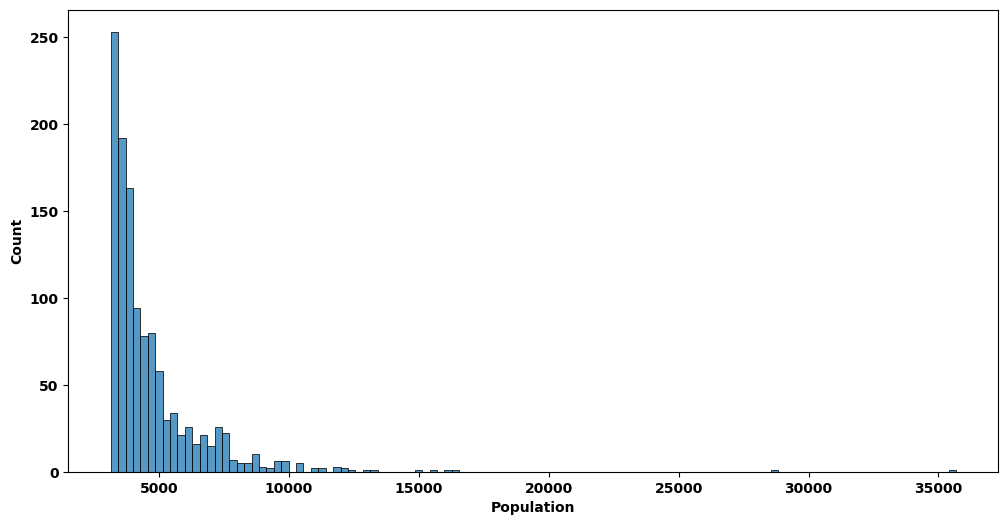

In [ ]:
# Visualizar la distribución de los datos mediante el histograma
sns.histplot(df_pop_out['Population'])

Se observa que los datos filtrados todavía contienen una serie de valores más concentrados que otros.

<AxesSubplot:>

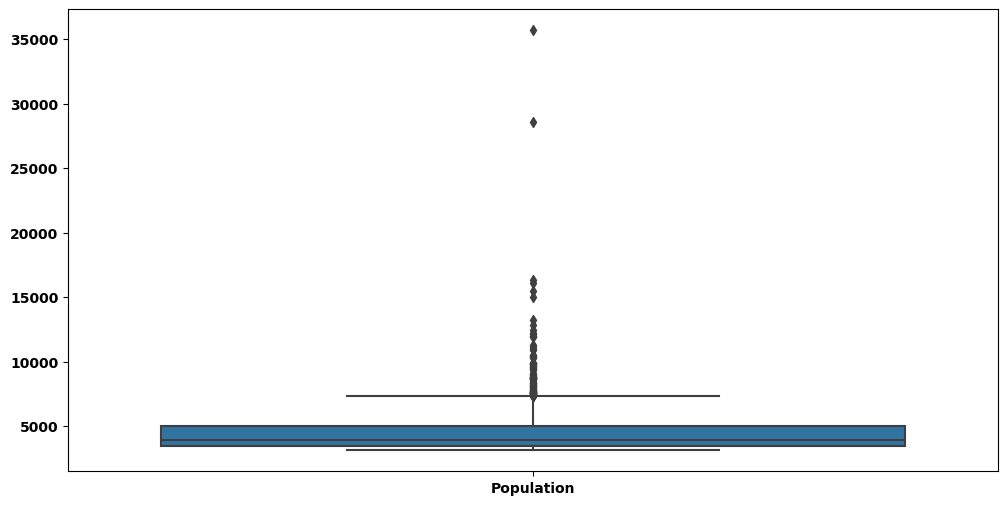

In [ ]:
sns.boxplot(data=df_pop_out['Population'].reset_index().drop('index', axis='columns'),  orient='v')

Antes de seguir analizando los valores de las variables del dataset, revisamos las relaciones que puede haber directamente entre cada variable de nuestro dataset.  

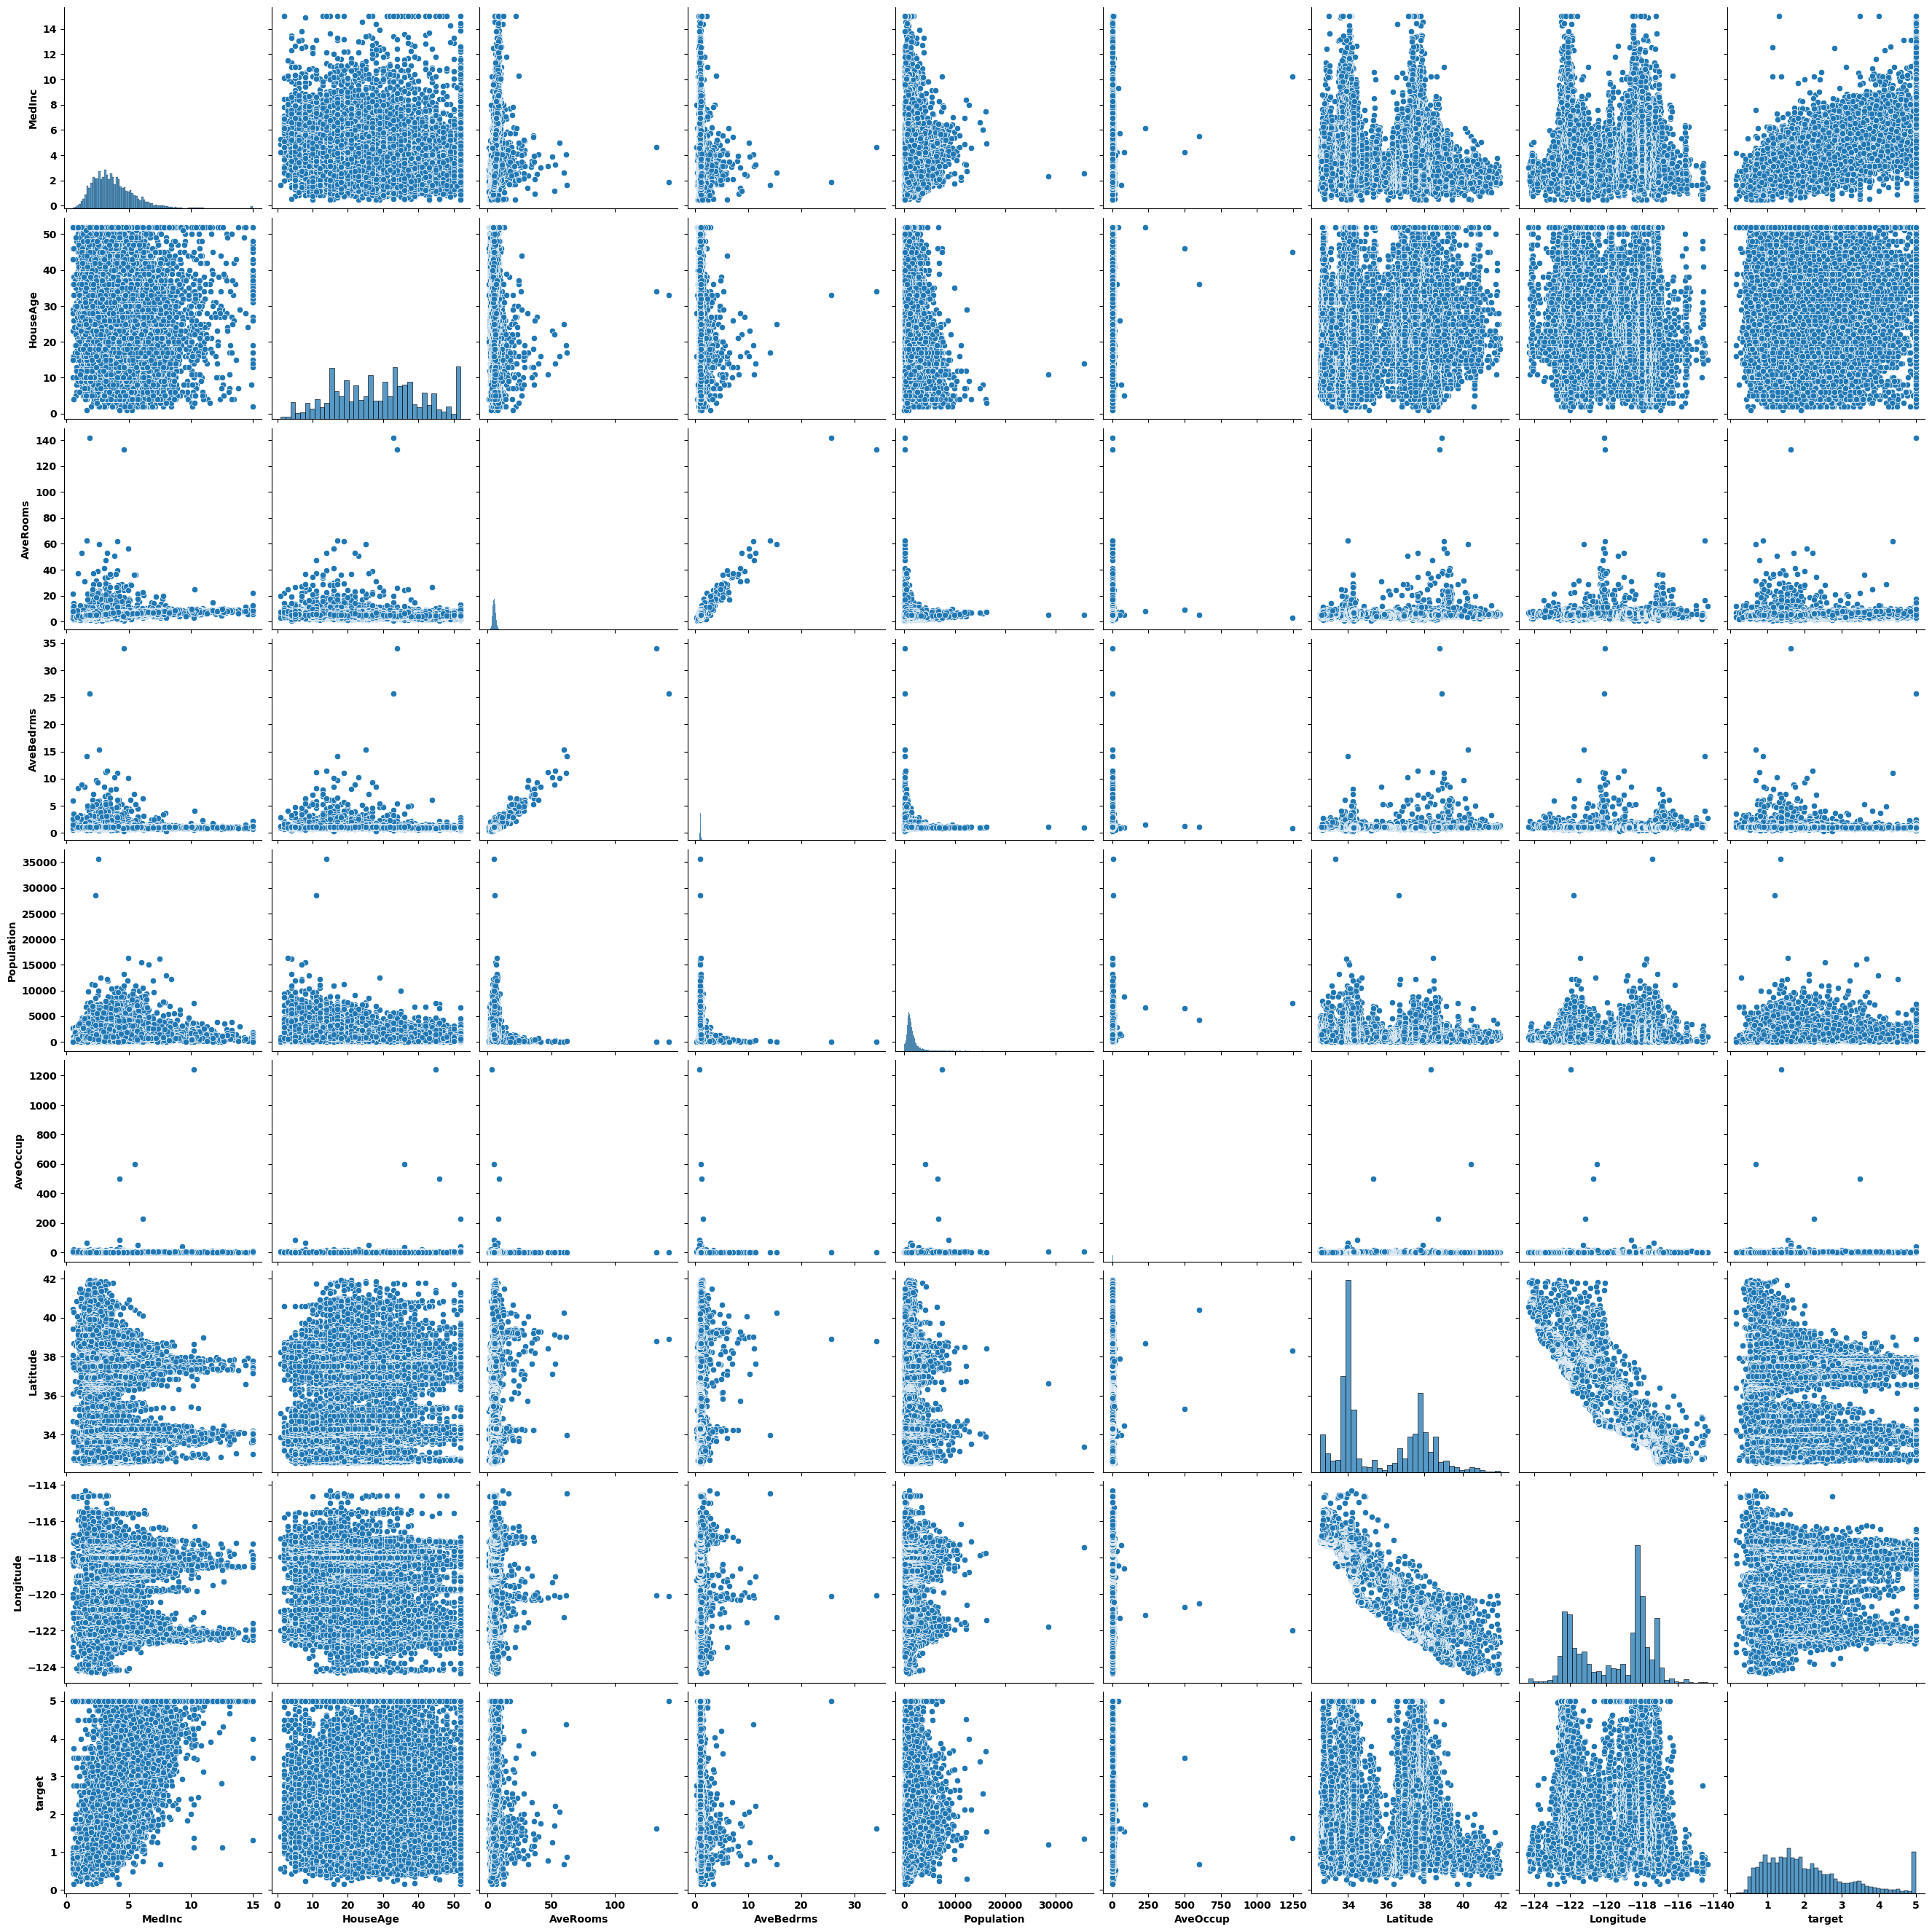

In [ ]:
# Visualizamos las relaciones de cada par de variables existentes en el conjunto de datos
sns.pairplot(data=df_california, height=3)
plt.show()

Podemos también calcular la correlación por pares de columnas y visualizar los coeficientes correspondientes de cada par de variables: 

In [ ]:
df_corr = df_california.corr()
df_corr

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
target      0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude    target  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Population -0.108785   0.099773 -0.024650  
AveOccup    0.002366   0.002476 -0.023737  
Latitude    1.000000  -0.924664 -0.144160  
Longitude  -0.924664   1.000000 -0.045967  
target     -0.144160  -0.045967  1.000000

In [ ]:
plt.figure(figsize = (16,8))
sns.heatmap(df_corr, cmap='Blues', annot = True)

<AxesSubplot:>

In [ ]:
# Filtramos las variable con menos correlación con la variable objetivo:
df_corr[df_corr['target'].abs() < 0.05]

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   

            Latitude  Longitude    target  
AveBedrms   0.069721   0.013344 -0.046701  
Population -0.108785   0.099773 -0.024650  
AveOccup    0.002366   0.002476 -0.023737  
Longitude  -0.924664   1.000000 -0.045967

- **Population** aparece como una de las variables con menos correlación con la variable de salida o ***target***. No parece que tenga mucha relación con el resto salvo con **HouseAge** y quizá la variable **AveOccup** que podría acoger la información ocupacional de una zona y aportar algo más directamente relacionado con el precio de una vivienda.

  Además, esta variable **por sus valores dispersos y el hecho de ser una variable cruda (no promediada) podría causarnos más problemas** más adelante a la hora de construir un modelo de regresión que añadir un valor predictivo, con lo cual procedemos a eliminarla.
  
- **AveBedrms** tiene una correlación muy baja con la variable objetivo cuando **AveRooms** tiene algo de relación. En realidad podemos pensar que **una variable que represente el concepto de número de cuartos en una vivienda debería de ser suficiente** para considerar este concepto en el modelo. El **AveBedrms** no tiene prácticamente ninguna relación con otras variables salvo el **AveRooms**, cuando ésta última tiene alguna correlación tanto con **target** como la variable **MedInc** y por lo tanto podemos quitar esta variable y eleminar una información menos relevante y posiblemente redundante.  

- Las variable geográficas de **Longitude** y **Latitud** puede que tengan muy poca correlación por separado con la varieble objetivo. Sin embargo, cuando se representan conjuntamente se puede ver que tienen una relación considerable con los precios de las viviendas Californianas. 

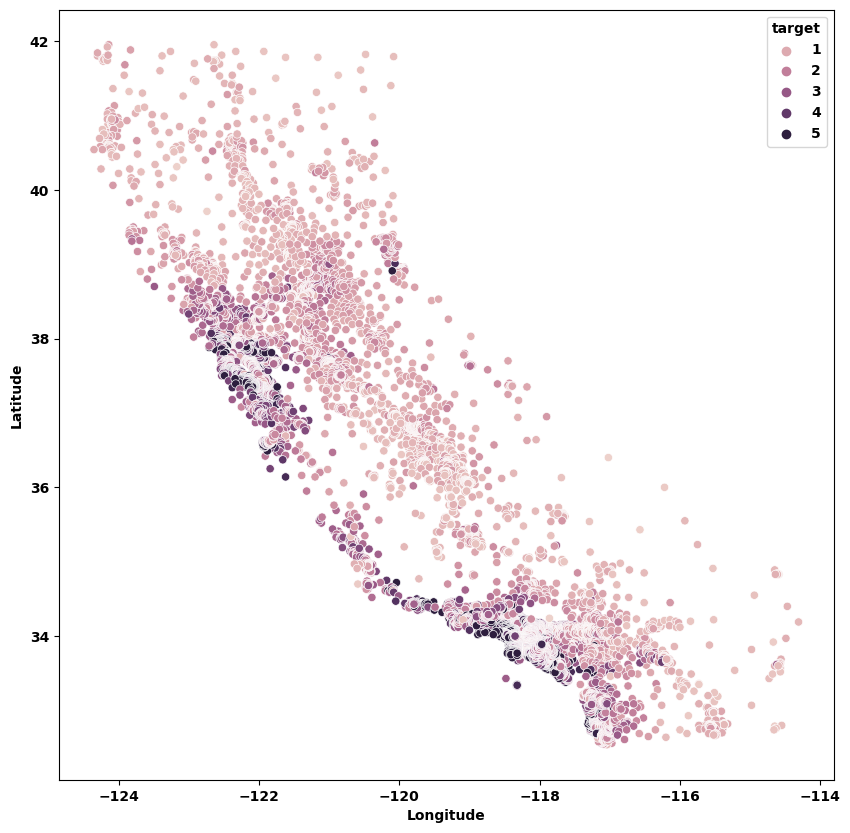

In [ ]:
# Diagrama Scatterplot pintado en base a los precios de viviendas (la variable "target")
plt.figure(figsize = (10,10))
sns.scatterplot(x=df_california['Longitude'], y=df_california['Latitude'], hue=df_california['target'])
plt.show()

Efectivamente hay una relación entre los puntos que se forman con pares de valores de estas dos variables y el precio de vivinedas. Básicamente **cada punto representa una posición geográfica en California**, en otras palabras tenemos pintado la ubicación de los grupos de bloques de viviendas presentes en nuestro dataset. A continuación vemos **una mapa censal del estado de California**: 

![California_population_map.png](attachment:California_population_map.png)

Filtramos el dataset quitando las dos columnas mencionadas anteriormente.

In [ ]:
df_california_filt = df_california.drop(labels=['Population', 'AveBedrms'], axis='columns')
df_california_filt

MedInc  HouseAge  AveRooms  AveOccup  Latitude  Longitude  target
0      8.3252      41.0  6.984127  2.555556     37.88    -122.23   4.526
1      8.3014      21.0  6.238137  2.109842     37.86    -122.22   3.585
2      7.2574      52.0  8.288136  2.802260     37.85    -122.24   3.521
3      5.6431      52.0  5.817352  2.547945     37.85    -122.25   3.413
4      3.8462      52.0  6.281853  2.181467     37.85    -122.25   3.422
...       ...       ...       ...       ...       ...        ...     ...
20635  1.5603      25.0  5.045455  2.560606     39.48    -121.09   0.781
20636  2.5568      18.0  6.114035  3.122807     39.49    -121.21   0.771
20637  1.7000      17.0  5.205543  2.325635     39.43    -121.22   0.923
20638  1.8672      18.0  5.329513  2.123209     39.43    -121.32   0.847
20639  2.3886      16.0  5.254717  2.616981     39.37    -121.24   0.894

[20640 rows x 7 columns]

<AxesSubplot:>

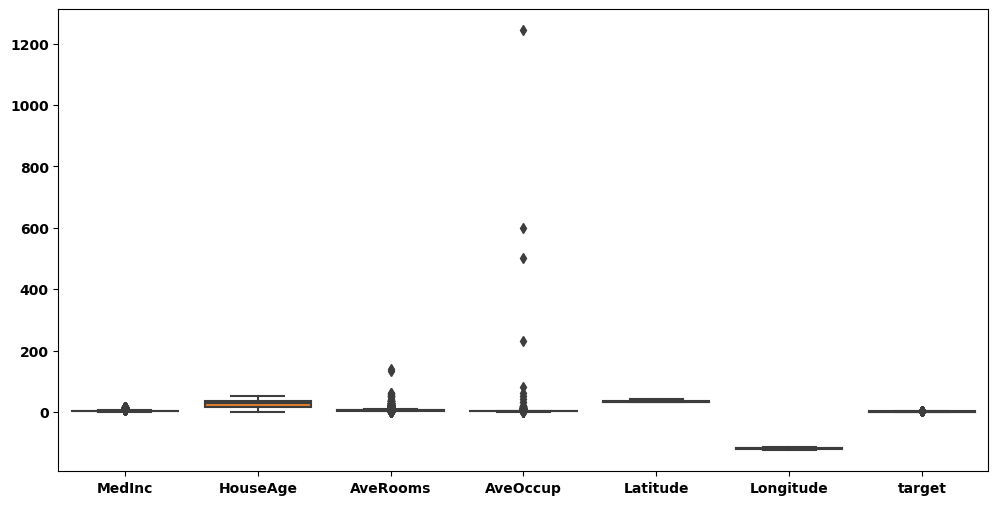

In [ ]:
# Visualizar el diagrama de cajas
sns.boxplot(data=df_california_filt,  orient='v')

Se observa que el conjunto de datos filtrados tiene menos dispersión en general salvo algunas de las variables. Las variables que pueden contener valores atípicos serían:
- **AveRooms**
- **AveOccup**

Vamos a revisar los valores presentes en la variable ***AveRooms***:

<AxesSubplot:>

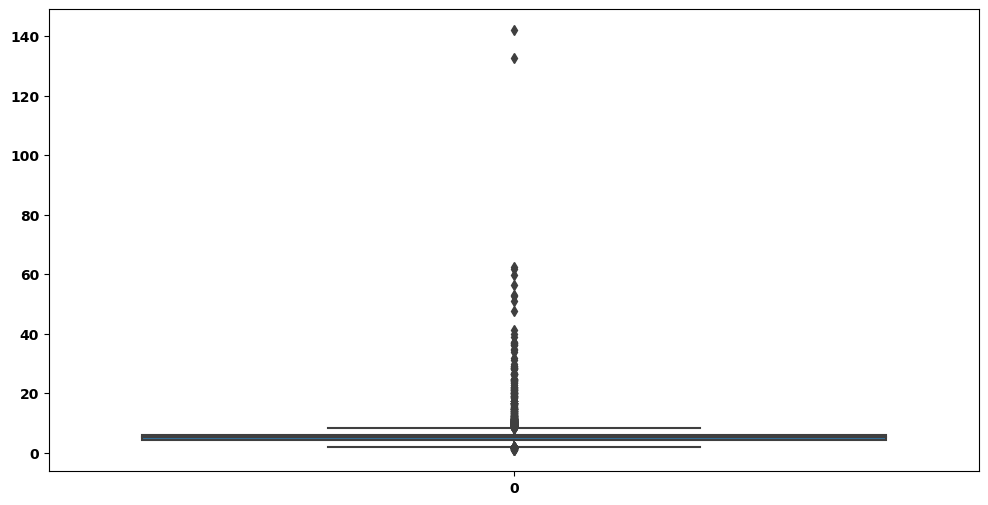

In [ ]:
sns.boxplot(data=df_california_filt['AveRooms'],  orient='v')

<AxesSubplot:xlabel='AveRooms', ylabel='Count'>

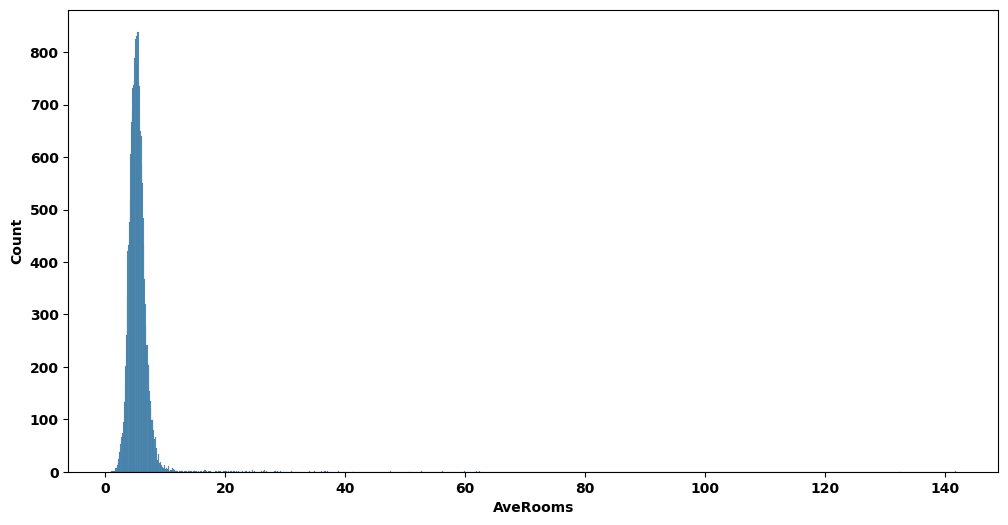

In [ ]:
sns.histplot(df_california_filt['AveRooms'])

In [ ]:
# Filtrar los valores atípicos basado en el rango intercuartil
Q1 = df_california_filt['AveRooms'].quantile(0.25)
Q3 = df_california_filt['AveRooms'].quantile(0.75)

# IQR es el rango intercuartil 
IQR = Q3 - Q1    

# Limites permitidos para los datos
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 *IQR

# Crear la máscara
filtro_oulier = (df_california_filt['AveRooms'] < lim_inf) | (df_california_filt['AveRooms'] > lim_sup)

# Filtramos el dataset aplicando la máscara
df_room_out = df_california_filt[filtro_oulier] 
df_room_out

MedInc  HouseAge  AveRooms  AveOccup  Latitude  Longitude   target
73      0.4999      46.0  1.714286  2.571429     37.81    -122.29  0.67500
155     8.8793      52.0  8.972868  3.337209     37.81    -122.23  4.10300
511    13.4990      42.0  8.928358  3.038806     37.82    -122.22  5.00001
512    12.2138      52.0  9.210227  2.843750     37.82    -122.23  5.00001
514    12.3804      52.0  9.122715  3.112272     37.82    -122.23  5.00001
...        ...       ...       ...       ...       ...        ...      ...
20408   7.7889      26.0  8.730038  3.201521     34.19    -118.88  3.09900
20426  10.0472      11.0  9.890756  3.487395     34.18    -118.69  5.00001
20428   8.7288       6.0  8.715842  3.351485     34.23    -118.83  4.25800
20436  12.5420      10.0  9.873315  3.177898     34.21    -118.69  5.00001
20462   5.8578      21.0  8.652174  3.459627     34.28    -118.76  2.66300

[511 rows x 7 columns]

In [ ]:
# El porcentaje que componen estos valores del todo el dataset
df_room_out.shape[0]/df_california.shape[0] * 100

2.47577519379845

El porcentaje de datos a filtrar se puede considerar algo elevado. A continuación vemos la distribución de los valores que se han detectado:

In [ ]:
df_room_out.describe()

MedInc    HouseAge    AveRooms    AveOccup    Latitude   Longitude  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     5.722787   21.778865   12.921201    3.769561   35.966575 -119.095577   
std      3.975385   13.619911   11.725555   22.126285    2.354000    2.061494   
min      0.499900    1.000000    0.846154    0.692308   32.630000 -123.490000   
25%      2.834300   12.000000    8.754054    2.333333   34.025000 -120.495000   
50%      4.131600   18.000000    9.625000    2.689243   34.280000 -118.490000   
75%      7.812800   29.000000   13.424380    3.106627   38.035000 -117.270000   
max     15.000100   52.000000  141.909091  502.461538   41.500000 -114.310000   

           target  
count  511.000000  
mean     2.607562  
std      1.602163  
min      0.149990  
25%      1.277000  
50%      1.945000  
75%      4.469000  
max      5.000010

<AxesSubplot:xlabel='AveRooms', ylabel='Count'>

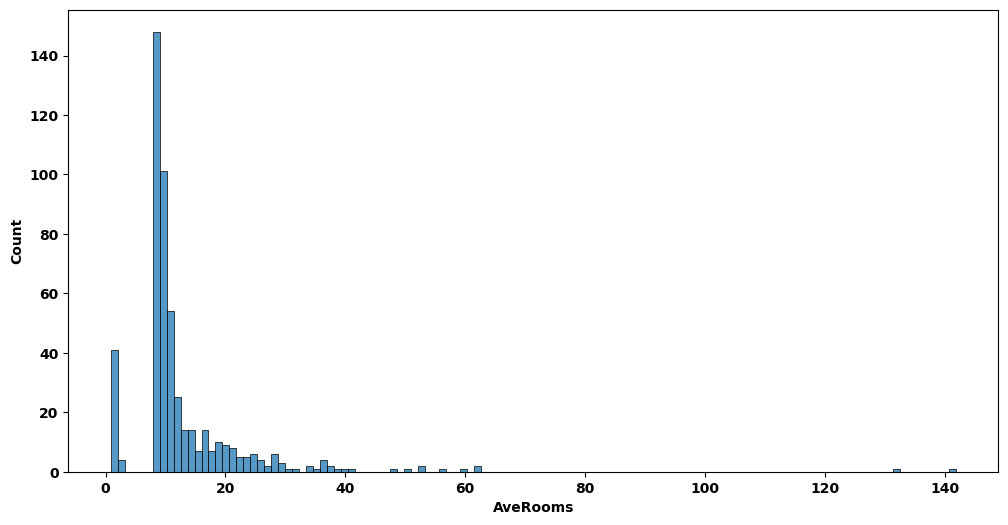

In [ ]:
sns.histplot(df_room_out['AveRooms'])

Se observa alguna concentración todavía esn estos datos. Igualmente procedemos a detactar los valores que se consideran atípicos (outliers) entre este conjunto de datos.

<AxesSubplot:>

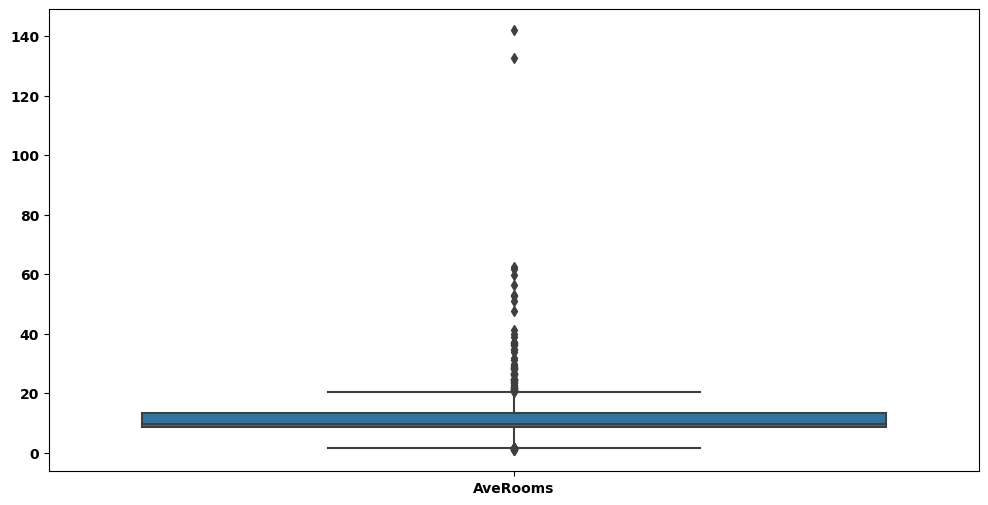

In [ ]:
sns.boxplot(data=df_room_out['AveRooms'].reset_index().drop('index', axis='columns'), orient='V')

In [ ]:
# Filtrar los valores atípicos basado en el rango intercuartil
Q1 = df_room_out['AveRooms'].quantile(0.25)
Q3 = df_room_out['AveRooms'].quantile(0.75)

# IQR es el rango intercuartil 
IQR = Q3 - Q1    

# Limites permitidos para los datos 
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 *IQR

# Crear la máscara
filtro_oulier = (df_room_out['AveRooms'] < lim_inf) | (df_room_out['AveRooms'] > lim_sup)

# Filtramos el dataset aplicando la máscara
df_room_outliers = df_room_out[filtro_oulier] 
df_room_outliers

MedInc  HouseAge   AveRooms  AveOccup  Latitude  Longitude  target
73     0.4999      46.0   1.714286  2.571429     37.81    -122.29   0.675
1024   3.1500      16.0  29.852941  1.980392     38.52    -120.00   1.406
1102   2.4028      17.0  31.777778  1.740741     40.06    -121.54   0.675
1234   4.4063      13.0  28.757282  2.446602     38.26    -120.33   1.558
1238   3.3542      10.0  28.112903  2.403226     38.29    -120.27   1.038
...       ...       ...        ...       ...       ...        ...     ...
19736  6.1359      14.0  22.823529  2.058824     40.12    -121.78   1.063
19975  2.1029      11.0  23.994152  2.081871     36.12    -118.54   0.991
19976  3.1250      10.0  21.095238  2.285714     36.19    -118.37   0.713
20093  2.0625      37.0  24.669118  2.485294     38.12    -120.12   0.889
20094  2.1250      26.0  37.063492  2.201058     38.19    -120.03   1.325

[85 rows x 7 columns]

In [ ]:
# El porcentaje que componen estos valores de todo el dataset
df_room_outliers.shape[0]/df_california.shape[0] * 100

0.41182170542635665

Esta vez el porcentaje de datos a filtrar no parece preocupante para hacernos perder una parte de la información que contiene el dataset.

In [ ]:
df_room_outliers.describe()

MedInc   HouseAge    AveRooms   AveOccup   Latitude   Longitude  \
count  85.000000  85.000000   85.000000  85.000000  85.000000   85.000000   
mean    3.198906  22.129412   26.372763   2.571412  36.936941 -119.279294   
std     2.061559  13.029991   23.538661   1.400796   2.329122    1.694558   
min     0.499900   2.000000    0.846154   0.692308  32.680000 -122.890000   
25%     1.906300  13.000000   20.520697   2.081871  34.240000 -120.220000   
50%     3.000000  19.000000   24.532895   2.400000  37.640000 -119.950000   
75%     4.081900  28.000000   33.989691   2.721374  39.090000 -118.270000   
max    15.000100  52.000000  141.909091  14.000000  40.270000 -114.490000   

          target  
count  85.000000  
mean    1.746788  
std     0.907556  
min     0.250000  
25%     1.125000  
50%     1.558000  
75%     2.000000  
max     5.000010

In [ ]:
sns.histplot(df_room_outliers['AveRooms'])

<AxesSubplot:xlabel='AveRooms', ylabel='Count'>

Ahora sí que los valores a filtrar tienen pinta de ser valores bastante dsipersos con una desviación importante. Como el porcentaje de estos datos no es elevado podemos proceder a aliminarlos y de esta manera filtrar otra vez el conjunto de datos.

In [ ]:
df_california_filt.drop(index=df_room_outliers.index).reset_index(drop=True)

MedInc  HouseAge  AveRooms  AveOccup  Latitude  Longitude  target
0      8.3252      41.0  6.984127  2.555556     37.88    -122.23   4.526
1      8.3014      21.0  6.238137  2.109842     37.86    -122.22   3.585
2      7.2574      52.0  8.288136  2.802260     37.85    -122.24   3.521
3      5.6431      52.0  5.817352  2.547945     37.85    -122.25   3.413
4      3.8462      52.0  6.281853  2.181467     37.85    -122.25   3.422
...       ...       ...       ...       ...       ...        ...     ...
20550  1.5603      25.0  5.045455  2.560606     39.48    -121.09   0.781
20551  2.5568      18.0  6.114035  3.122807     39.49    -121.21   0.771
20552  1.7000      17.0  5.205543  2.325635     39.43    -121.22   0.923
20553  1.8672      18.0  5.329513  2.123209     39.43    -121.32   0.847
20554  2.3886      16.0  5.254717  2.616981     39.37    -121.24   0.894

[20555 rows x 7 columns]

In [ ]:
# Comprobamos el tamaño del dataset filtrado por si acaso
df_california_filt.shape[0] - df_room_outliers.shape[0]

20555

In [ ]:
# Filtramos el dataset, eliminando estos registros identificados como outliers
df_california_filt2 = df_california_filt.drop(index=df_room_outliers.index).reset_index(drop=True)
df_california_filt2

MedInc  HouseAge  AveRooms  AveOccup  Latitude  Longitude  target
0      8.3252      41.0  6.984127  2.555556     37.88    -122.23   4.526
1      8.3014      21.0  6.238137  2.109842     37.86    -122.22   3.585
2      7.2574      52.0  8.288136  2.802260     37.85    -122.24   3.521
3      5.6431      52.0  5.817352  2.547945     37.85    -122.25   3.413
4      3.8462      52.0  6.281853  2.181467     37.85    -122.25   3.422
...       ...       ...       ...       ...       ...        ...     ...
20550  1.5603      25.0  5.045455  2.560606     39.48    -121.09   0.781
20551  2.5568      18.0  6.114035  3.122807     39.49    -121.21   0.771
20552  1.7000      17.0  5.205543  2.325635     39.43    -121.22   0.923
20553  1.8672      18.0  5.329513  2.123209     39.43    -121.32   0.847
20554  2.3886      16.0  5.254717  2.616981     39.37    -121.24   0.894

[20555 rows x 7 columns]

In [ ]:
# Revisamos las características del nuevo dataset recién filtrado
df_california_filt2.describe()

MedInc      HouseAge      AveRooms      AveOccup      Latitude  \
count  20555.000000  20555.000000  20555.000000  20555.000000  20555.000000   
mean       3.873449     28.666407      5.342392      3.072720     35.626465   
std        1.898685     12.577021      1.435620     10.407068      2.133522   
min        0.499900      1.000000      1.750814      0.750000     32.540000   
25%        2.565800     18.000000      4.440684      2.431929     33.930000   
50%        3.537900     29.000000      5.226221      2.820961     34.250000   
75%        4.746500     37.000000      6.043219      3.283116     37.710000   
max       15.000100     52.000000     20.336683   1243.333333     41.950000   

          Longitude        target  
count  20555.000000  20555.000000  
mean    -119.570905      2.069889  
std        2.004658      1.154697  
min     -124.350000      0.149990  
25%     -121.800000      1.197000  
50%     -118.490000      1.798000  
75%     -118.010000      2.650000  
max     -114.310000      5.000010

In [ ]:
sns.boxplot(data=df_california_filt2,  orient='v')

<AxesSubplot:>

Ahora repasamos el conenido de la variable ***AveOccup*** con posibles outliers.

<AxesSubplot:>

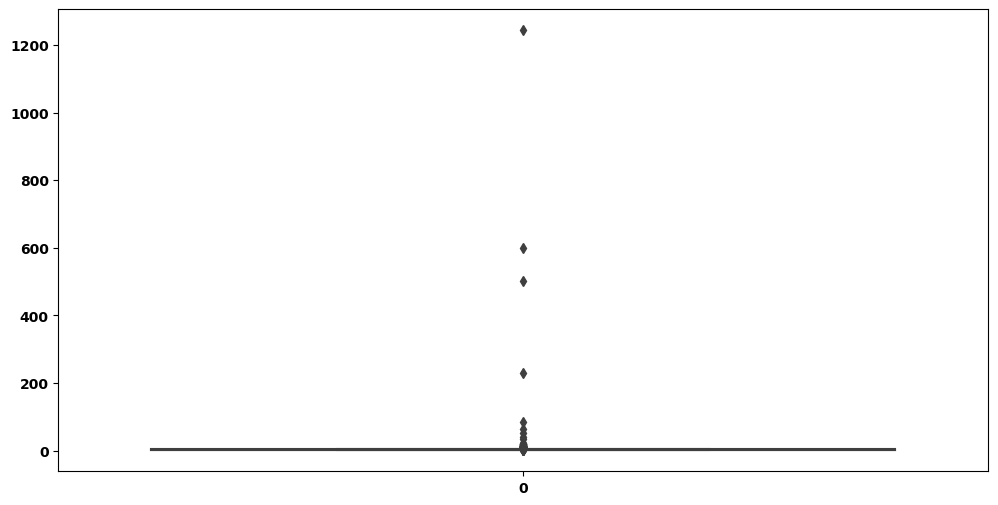

In [ ]:
sns.boxplot(data=df_california_filt2['AveOccup'],  orient='v')

In [ ]:
sns.histplot(df_california_filt2['AveOccup'])

<AxesSubplot:xlabel='AveOccup', ylabel='Count'>

In [ ]:
# Filtrar los valores atípicos basado en el rango intercuartil
Q1 = df_california_filt2['AveOccup'].quantile(0.25)
Q3 = df_california_filt2['AveOccup'].quantile(0.75)

# IQR es el rango intercuartil 
IQR = Q3 - Q1    

# Limites permitidos para los datos
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 *IQR

# Crear la máscara
filtro_oulier = (df_california_filt2['AveOccup'] < lim_inf) | (df_california_filt2['AveOccup'] > lim_sup)

# Filtramos el dataset aplicando la máscara
df_ocup_out = df_california_filt2[filtro_oulier] 
df_ocup_out

MedInc  HouseAge  AveRooms   AveOccup  Latitude  Longitude   target
88     1.2434      52.0  2.929412   4.658824     37.80    -122.27  5.00001
90     0.8668      52.0  2.443182  10.272727     37.80    -122.28  1.37500
91     0.7500      52.0  2.823529   5.617647     37.80    -122.28  1.62500
199    3.0257      52.0  4.046948   4.666667     37.78    -122.23  0.80800
269    3.8750      33.0  3.021277  12.234043     37.78    -122.18  2.25000
...       ...       ...       ...        ...       ...        ...      ...
20268  5.0066      12.0  3.800000   4.600000     34.13    -119.05  2.75000
20308  5.7560      16.0  6.117493   5.240209     34.22    -118.88  3.02700
20428  2.6250      34.0  5.597403   5.077922     38.67    -121.63  2.25000
20442  1.4653       7.0  3.525794   8.886905     38.54    -121.79  3.10000
20516  1.5694      30.0  5.022727   4.693182     39.13    -121.57  0.57900

[711 rows x 7 columns]

In [ ]:
# El porcentaje que componen estos valores de todo el dataset
df_ocup_out.shape[0]/df_california.shape[0] * 100

3.444767441860465

Otra vez el porcentaje de los datos a eliminar es algo difícil de ignorar. Consultamos las estadísticas de estos valores.

In [ ]:
df_ocup_out.describe()

MedInc    HouseAge    AveRooms     AveOccup    Latitude  \
count  711.000000  711.000000  711.000000   711.000000  711.000000   
mean     2.958938   30.631505    4.467398     9.483930   34.743361   
std      1.480152   10.861189    1.214988    55.514146    1.581293   
min      0.499900    4.000000    1.819277     0.750000   32.560000   
25%      2.110050   24.000000    3.708142     4.701803   33.910000   
50%      2.684200   32.000000    4.289700     4.978102   34.040000   
75%      3.592500   37.000000    5.060288     5.524188   34.960000   
max     15.000100   52.000000   11.384615  1243.333333   41.810000   

        Longitude      target  
count  711.000000  711.000000  
mean  -118.805921    1.498712  
std      1.543645    0.779207  
min   -124.150000    0.225000  
25%   -119.170000    1.092500  
50%   -118.230000    1.416000  
75%   -117.930000    1.642000  
max   -114.610000    5.000010

<AxesSubplot:xlabel='AveOccup', ylabel='Count'>

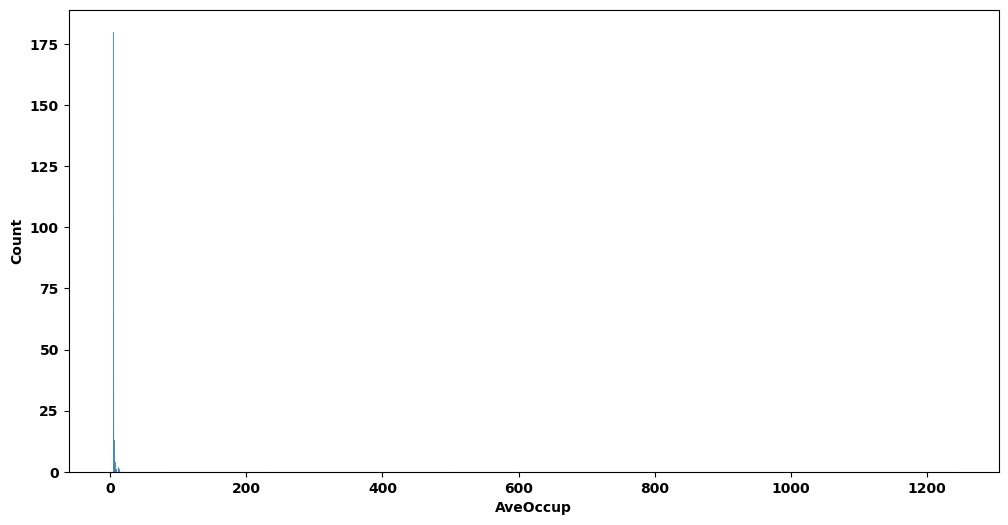

In [ ]:
sns.histplot(df_ocup_out['AveOccup'])

Se observa que los datos detectados como valores atípicos contienen todavía alguna concentración, por lo tanto vamos a intentar a identificar los valores atípicos dentro de este conjunto.

<AxesSubplot:>

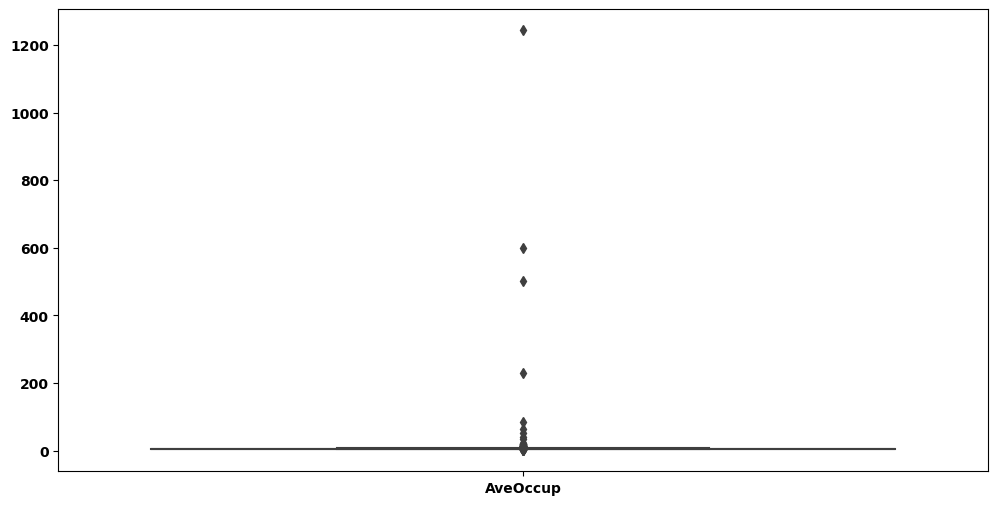

In [ ]:
sns.boxplot(data=df_ocup_out['AveOccup'].reset_index().drop('index', axis='columns'), orient='V')

In [ ]:
# Filtrar los valores atípicos basada en el rango intercuartil
Q1 = df_ocup_out['AveOccup'].quantile(0.25)
Q3 = df_ocup_out['AveOccup'].quantile(0.75)

# IQR es el rango intercuartil 
IQR = Q3 - Q1    

# Limites permitidos para los datos
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 *IQR

# Crear la máscara
filtro_oulier = (df_ocup_out['AveOccup'] < lim_inf) | (df_ocup_out['AveOccup'] > lim_sup)

# Filtramos el dataset aplicando la máscara
df_ocup_outliers = df_ocup_out[filtro_oulier] 
df_ocup_outliers

MedInc  HouseAge  AveRooms   AveOccup  Latitude  Longitude  target
90     0.8668      52.0  2.443182  10.272727     37.80    -122.28   1.375
269    3.8750      33.0  3.021277  12.234043     37.78    -122.18   2.250
459    1.4012      52.0  3.105714   9.534286     37.87    -122.26   1.750
1037   4.3029      16.0  6.090592  17.177700     38.42    -120.97   1.219
1065   3.4191      52.0  4.530612  11.295918     39.73    -121.85   1.375
...       ...       ...       ...        ...       ...        ...     ...
19772  2.7969      18.0  6.335227   9.897727     36.42    -119.35   1.238
20036  3.1719       8.0  6.979221  13.212987     37.79    -120.45   1.154
20239  3.5625      31.0  4.386905   8.547619     34.25    -119.12   1.941
20267  4.0208       8.0  2.500000  19.312500     34.22    -119.09   0.525
20442  1.4653       7.0  3.525794   8.886905     38.54    -121.79   3.100

[79 rows x 7 columns]

In [ ]:
# El porcentaje que componen estos valores de todo el dataset
df_ocup_outliers.shape[0]/df_california.shape[0] * 100

0.38275193798449614

In [ ]:
df_ocup_outliers.describe()

MedInc   HouseAge   AveRooms     AveOccup   Latitude   Longitude  \
count  79.000000  79.000000  79.000000    79.000000  79.000000   79.000000   
mean    3.590241  27.936709   4.858739    44.824684  35.723418 -119.663418   
std     2.812360  15.395922   1.894615   163.179489   2.059135    1.925669   
min     0.499900   4.000000   2.111111     0.750000  32.560000 -122.710000   
25%     1.945850  16.000000   3.305674     7.603611  34.020000 -121.405000   
50%     3.083300  26.000000   4.573123     9.649485  35.130000 -119.350000   
75%     4.225000  38.500000   5.862337    13.644157  37.745000 -118.115000   
max    15.000100  52.000000  11.384615  1243.333333  40.410000 -115.220000   

          target  
count  79.000000  
mean    1.879393  
std     1.196393  
min     0.375000  
25%     1.195000  
50%     1.590000  
75%     2.250000  
max     5.000010

<AxesSubplot:xlabel='AveOccup', ylabel='Count'>

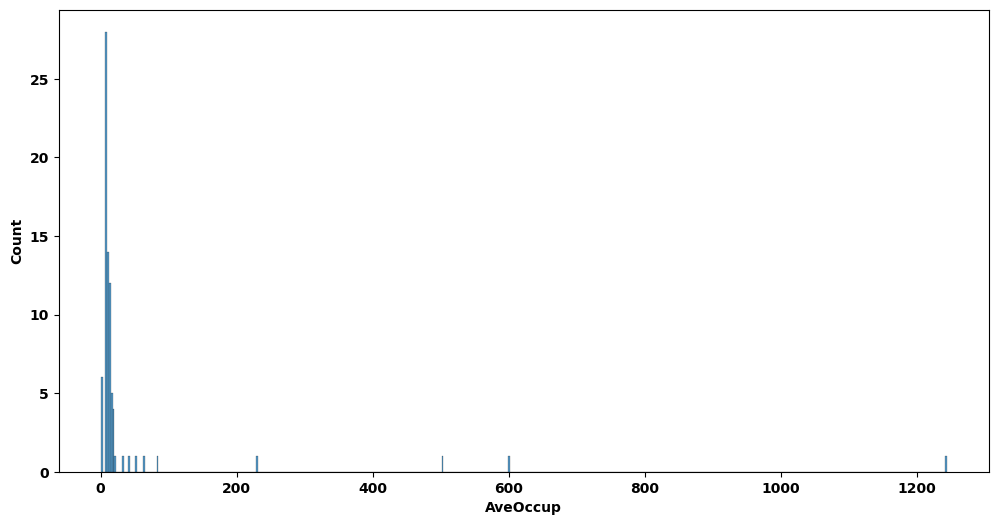

In [ ]:
sns.histplot(df_ocup_outliers['AveOccup'])

Como estos valores son muy dispersos y además forman un porcentaje muy pequeño respecto a todos los datos del dataset original, procedemos a eliminarlos.

In [ ]:
df_california_filt2.drop(index=df_ocup_outliers.index).reset_index(drop=True)

MedInc  HouseAge  AveRooms  AveOccup  Latitude  Longitude  target
0      8.3252      41.0  6.984127  2.555556     37.88    -122.23   4.526
1      8.3014      21.0  6.238137  2.109842     37.86    -122.22   3.585
2      7.2574      52.0  8.288136  2.802260     37.85    -122.24   3.521
3      5.6431      52.0  5.817352  2.547945     37.85    -122.25   3.413
4      3.8462      52.0  6.281853  2.181467     37.85    -122.25   3.422
...       ...       ...       ...       ...       ...        ...     ...
20471  1.5603      25.0  5.045455  2.560606     39.48    -121.09   0.781
20472  2.5568      18.0  6.114035  3.122807     39.49    -121.21   0.771
20473  1.7000      17.0  5.205543  2.325635     39.43    -121.22   0.923
20474  1.8672      18.0  5.329513  2.123209     39.43    -121.32   0.847
20475  2.3886      16.0  5.254717  2.616981     39.37    -121.24   0.894

[20476 rows x 7 columns]

In [ ]:
# Comprobamos el tamaño de los datos resultantes
df_california_filt2.shape[0] - df_ocup_outliers.shape[0]

20476

In [ ]:
df_california_filt3 = df_california_filt2.drop(index=df_ocup_outliers.index).reset_index(drop=True)
df_california_filt3

MedInc  HouseAge  AveRooms  AveOccup  Latitude  Longitude  target
0      8.3252      41.0  6.984127  2.555556     37.88    -122.23   4.526
1      8.3014      21.0  6.238137  2.109842     37.86    -122.22   3.585
2      7.2574      52.0  8.288136  2.802260     37.85    -122.24   3.521
3      5.6431      52.0  5.817352  2.547945     37.85    -122.25   3.413
4      3.8462      52.0  6.281853  2.181467     37.85    -122.25   3.422
...       ...       ...       ...       ...       ...        ...     ...
20471  1.5603      25.0  5.045455  2.560606     39.48    -121.09   0.781
20472  2.5568      18.0  6.114035  3.122807     39.49    -121.21   0.771
20473  1.7000      17.0  5.205543  2.325635     39.43    -121.22   0.923
20474  1.8672      18.0  5.329513  2.123209     39.43    -121.32   0.847
20475  2.3886      16.0  5.254717  2.616981     39.37    -121.24   0.894

[20476 rows x 7 columns]

In [ ]:
df_california_filt3.describe()

MedInc      HouseAge      AveRooms      AveOccup      Latitude  \
count  20476.000000  20476.000000  20476.000000  20476.000000  20476.000000   
mean       3.874542     28.669223      5.344258      2.911633     35.626091   
std        1.894327     12.565298      1.433309      0.731251      2.133844   
min        0.499900      1.000000      1.750814      1.161290     32.540000   
25%        2.567000     18.000000      4.442904      2.430613     33.930000   
50%        3.539100     29.000000      5.227103      2.817710     34.250000   
75%        4.750000     37.000000      6.045093      3.277262     37.710000   
max       15.000100     52.000000     20.336683      6.739583     41.950000   

          Longitude        target  
count  20476.000000  20476.000000  
mean    -119.570548      2.070624  
std        2.004994      1.154503  
min     -124.350000      0.149990  
25%     -121.800000      1.197000  
50%     -118.490000      1.800000  
75%     -118.010000      2.651000  
max     -114.310000      5.000010

<AxesSubplot:>

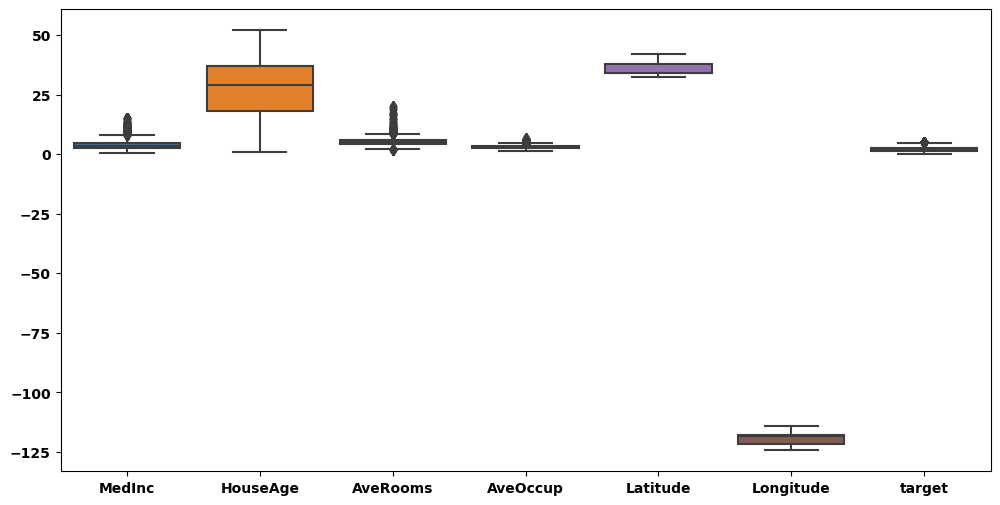

In [ ]:
sns.boxplot(data=df_california_filt3,  orient='v')

Comprobamos el porcentaje de los registros del dataset que se ha obtenido finalmente aplicando todos los filtros anteriores: 

In [ ]:
df_california_filt3.shape[0] / df_california.shape[0] * 100

99.20542635658914

Volvemos a investigar las relaciones entre los pares de variables, esta vez con los datos filtrados.

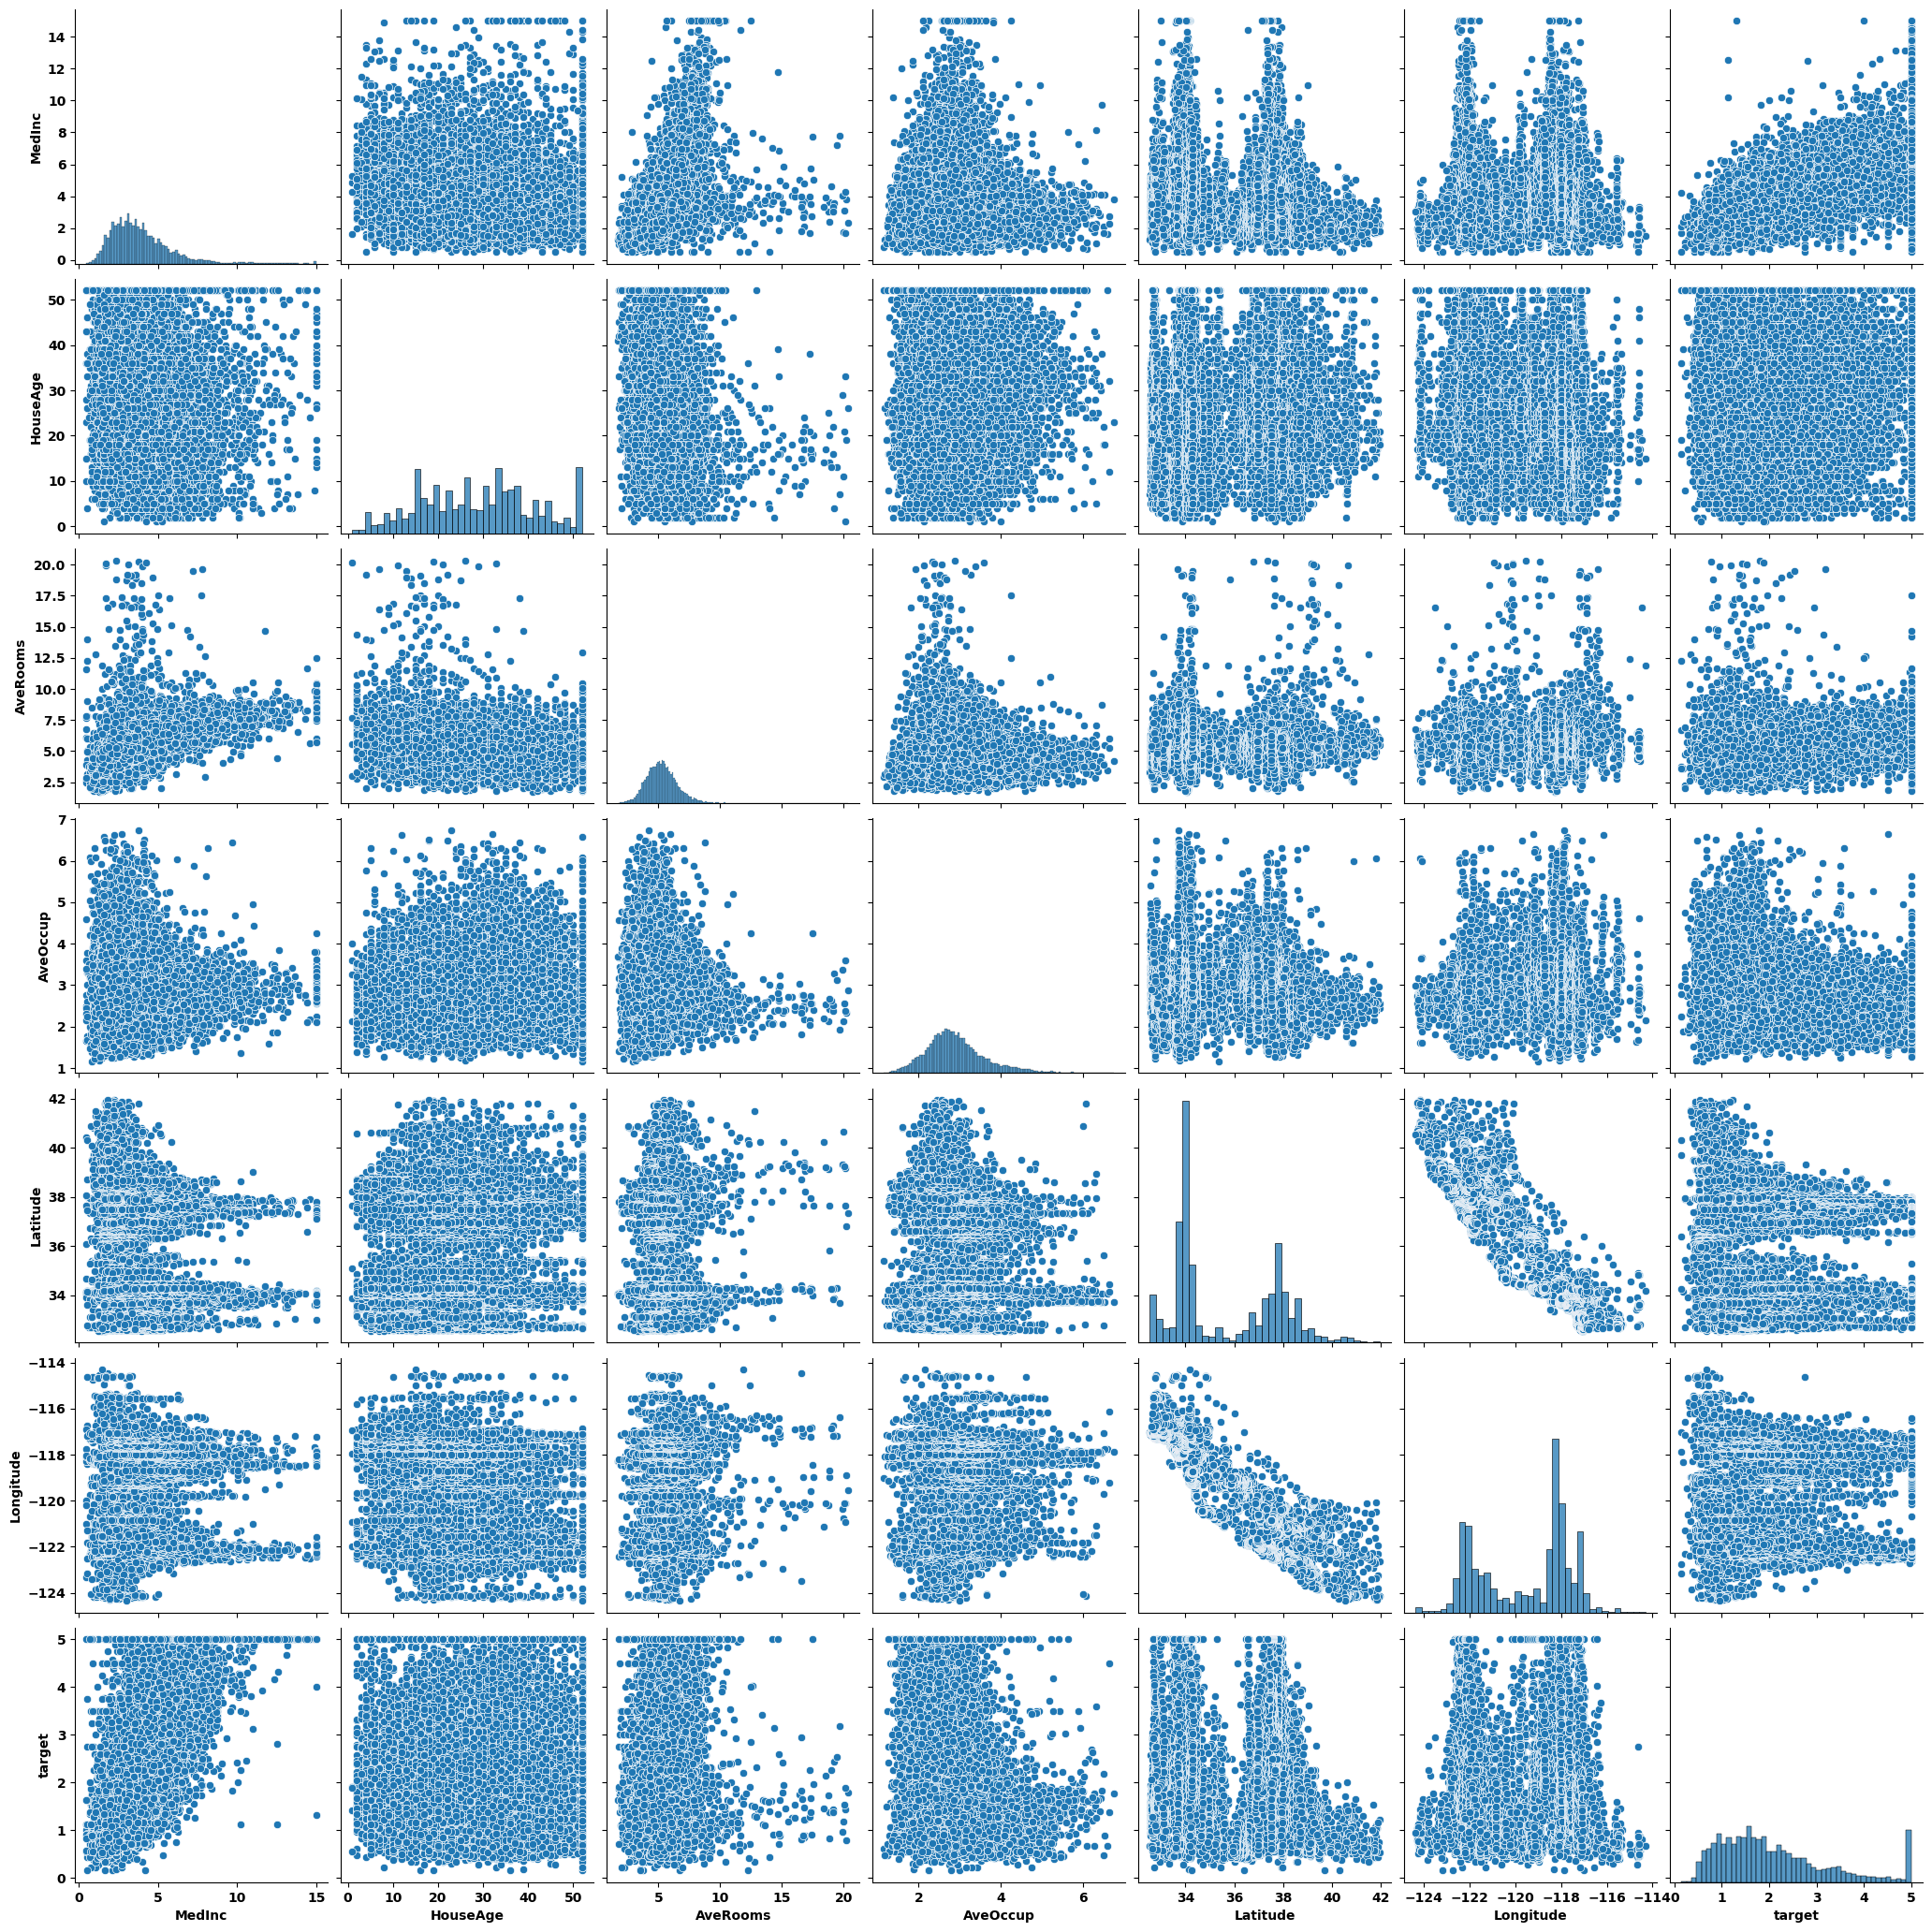

In [ ]:
sns.pairplot(data=df_california_filt3, height=3)
plt.show()

Se observa que por la eliminación de los valores considerablemente atípicos, los diagramas de dispersión visualizan mejor las relaciones de cada conjunto de variables presentes en el dataset.

<AxesSubplot:>

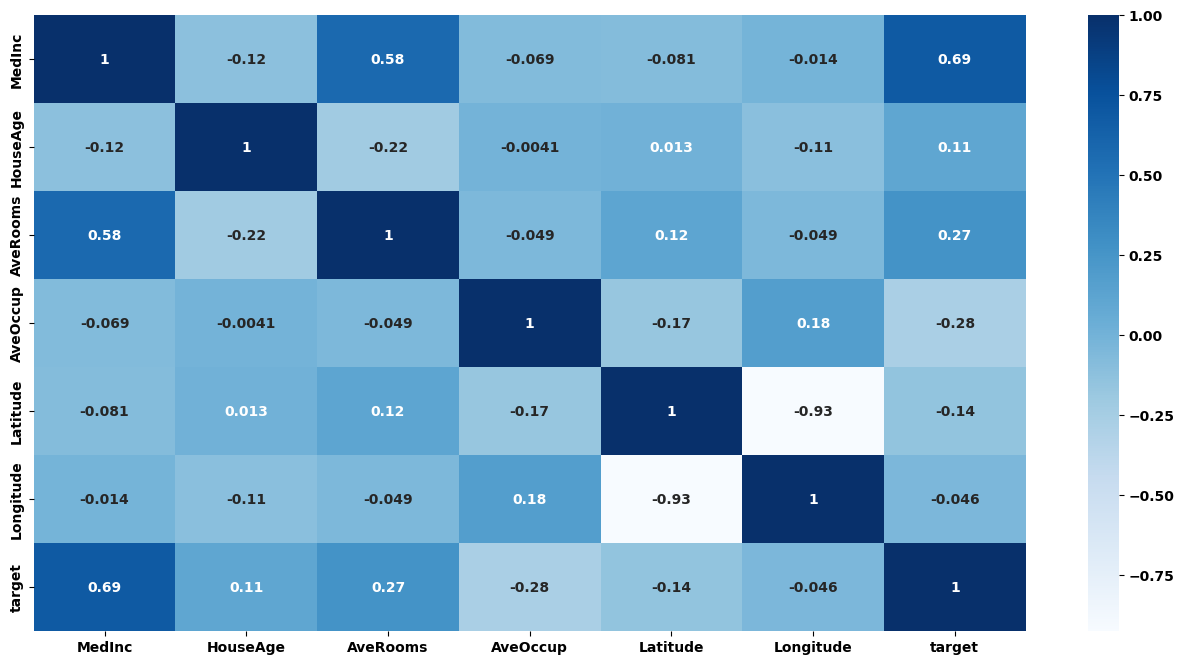

In [ ]:
plt.figure(figsize = (16,8))
sns.heatmap(df_california_filt3.corr(), cmap='Blues', annot = True)

---

### **2-Creación de modelos** 

In [ ]:
# Definimos los conjuntos de variables de entrada y la variable de salida
X_multiple = df_california_filt3.drop(['target'], axis='columns')
y_multiple = df_california_filt3['target']

NameError: name 'df_california_filt3' is not defined

In [ ]:
# Dividir el dataset en Training y Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=222)

NameError: name 'X_multiple' is not defined

In [ ]:
X_multiple

MedInc  HouseAge  AveRooms  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  2.181467     37.85    -122.25
...       ...       ...       ...       ...       ...        ...
20471  1.5603      25.0  5.045455  2.560606     39.48    -121.09
20472  2.5568      18.0  6.114035  3.122807     39.49    -121.21
20473  1.7000      17.0  5.205543  2.325635     39.43    -121.22
20474  1.8672      18.0  5.329513  2.123209     39.43    -121.32
20475  2.3886      16.0  5.254717  2.616981     39.37    -121.24

[20476 rows x 6 columns]

In [ ]:
y_multiple

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20471    0.781
20472    0.771
20473    0.923
20474    0.847
20475    0.894
Name: target, Length: 20476, dtype: float64

### Regresión lineal múltiple

### **`Ejercicio 11.1`**

Vamos a realizar el primer modelo de regresión:

**`11.1.1`** Construye como ejercicios anteriores en este bloque, un modelo de *Regresión lineal múltiple* para este conjunto de variables de entrada y la variable de salida.
   
**`11.1.2`** Consulta y visualiza los coeficientes del modelo ajustado.  

**`11.1.3`** Calcula diferentes métricas para evaluar tu modelo y explica si este modelo tiene un rendimiendo aceptable:  
- MAE
- MAPE
- MSE
- RMSE
- $R^2$

In [ ]:
## Solución
# Ejercicio 11.1.1
from sklearn.linear_model import LinearRegression
mod_lin_reg= LinearRegression() 
mod_lin_reg.fit(X_train,y_train)
mod_lr_predict=mod_lin_reg.predict(X_test)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

 Valor de las pendientes o coeficientes "a":
[ 0.37241128  0.00987665 -0.00790733 -0.38299263 -0.45357548 -0.4377589 ]

 Valor de la intersección o coeficiente "b":
-34.68238577886301


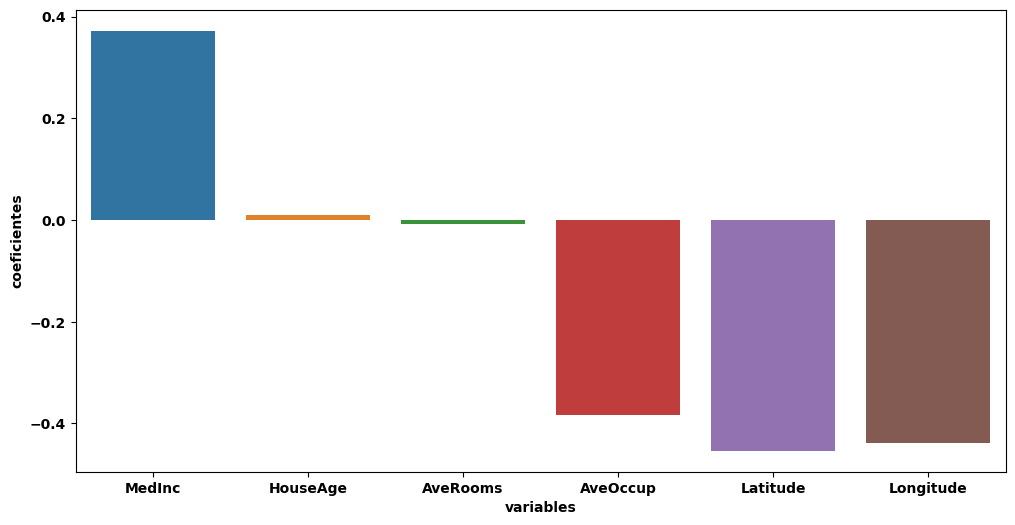

In [ ]:
## Solución
# Ejercicio 11.1.2
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(mod_lin_reg.coef_)
print('\n', 'Valor de la intersección o coeficiente "b":')
print(mod_lin_reg.intercept_)



df_coef = pd.DataFrame(X_multiple.columns, columns=['variables'])
df_coef['coeficientes'] = mod_lin_reg.coef_

sns.barplot(x=df_coef['variables'], y=df_coef['coeficientes'])
plt.show()

In [ ]:
## Solución
# Ejercicio 11.1.3
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test,mod_lr_predict))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, mod_lr_predict)*100)
print('Mean Squared Error:', mean_squared_error(y_test, mod_lr_predict))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, mod_lr_predict)))
print('R^2 coefficient of determination:', r2_score(y_test, mod_lr_predict))


Mean Absolute Error: 0.5027019266156714
Mean Absolute Percentage Error: 31.01431672039412
Mean Squared Error: 0.4629156059962052
Root Mean Squared Error: 0.6803790164284942
R^2 coefficient of determination: 0.659183104631158


Como podemos observar en nuestras metricas para evaluar nuestro modelo podemos observar que tiene un 31 % de error y un R2 de 0,65,no es demasiado bueno,bajo mi punta de vista

### Ridge (L2) regression

### **`Ejercicio 11.2`**

Vamos a realizar otro tipo de modelo de regresión:

**`11.2.1`** Construye como ejercicios anteriores en este bloque, un modelo de *Regresión con la penalización tipo Ridge (L2)* para este conjunto de variables de entrada y la variable de salida. (poniendo `alpha = 1, random_state=100`)
   
**`11.2.2`** Consulta y visualiza y compara como los ejercicios anteriores de este bloque los coeficientes del modelo ajustado.  

**`11.2.3`** Calcula diferentes métricas para evaluar tu modelo y explica si este modelo tiene un rendimiendo aceptable en comparación con el modelo anterior:  
  
- MAE
- MAPE
- MSE
- RMSE
- $R^2$



In [ ]:
## Solución
# Ejercicio 11.2.1
from sklearn.linear_model import Ridge
 
# Entrenamos 
mod_L2_reg = Ridge(alpha = 1, random_state=100)
mod_L2_reg.fit(X_train, y_train)
y_pred_l2_mod = mod_L2_reg.predict(X_test)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE l2

 Valor de las pendientes o coeficientes "a":
[ 0.37242612  0.00987808 -0.00792533 -0.38294856 -0.45347182 -0.43765256]

 Valor de la intersección o coeficiente "b":
-34.673494397942605


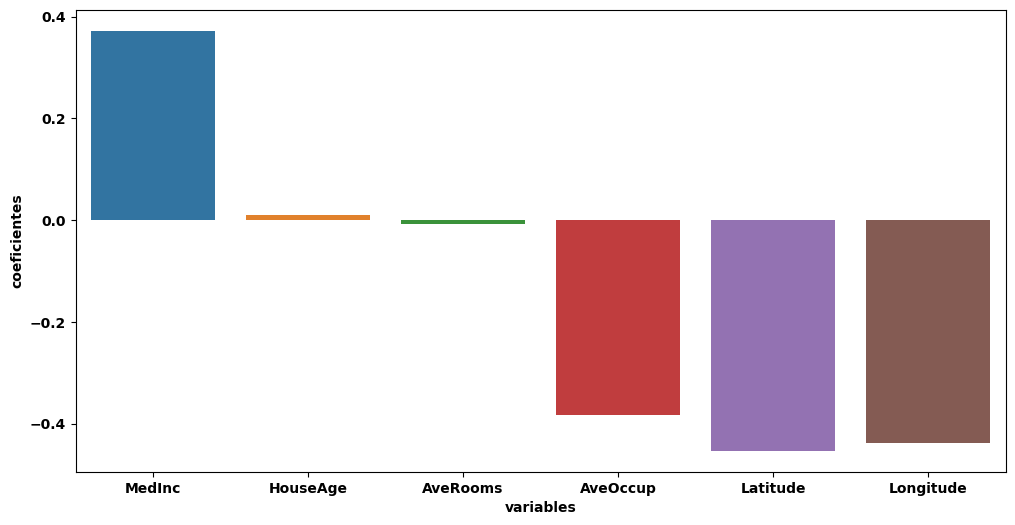

In [ ]:
## Solución
# Ejercicio 11.2.2
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE l2')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(mod_L2_reg.coef_)
print('\n', 'Valor de la intersección o coeficiente "b":')
print(mod_L2_reg.intercept_)



df_coef = pd.DataFrame(X_multiple.columns, columns=['variables'])
df_coef['coeficientes'] = mod_L2_reg.coef_

sns.barplot(x=df_coef['variables'], y=df_coef['coeficientes'])
plt.show()

In [ ]:
## Solución
# Ejercicio 11.2.3
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_l2_mod))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_l2_mod)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_l2_mod))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_l2_mod)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_l2_mod))

Mean Absolute Error: 0.5026994824123519
Mean Absolute Percentage Error: 31.013942363603597
Mean Squared Error: 0.4629166938985364
Root Mean Squared Error: 0.6803798159105959
R^2 coefficient of determination: 0.6591823036741582


Como podemos observar en nuestras metricas para evaluar a nuestro modelo son practicamente iguales aun habiendo aplicado la regulacion Ridge,por lo que no es funcional aplicar la regulacion en este caso.

### Lasso (L1) regression

### **`Ejercicio 11.3`**

Vamos a realizar otro tipo de modelo de regresión:

**`11.3.1`** Construye como ejercicios anteriores en este bloque, un modelo de *Regresión con la penalización tipo Lasso (L1)* para este conjunto de variables de entrada y la variable de salida. (poniendo `alpha = 1, random_state=100`)
   
**`11.3.2`** Consulta y visualiza y compara como los ejercicios anteriores de este bloque los coeficientes del modelo ajustado.  

**`11.3.3`** Calcula diferentes métricas para evaluar tu modelo y explica si este modelo tiene un rendimiendo aceptable en comparación con los modelos anteriores:  
  
- MAE
- MAPE
- MSE
- RMSE
- $R^2$



In [ ]:
## Solución
# Ejercicio 11.3.1
from sklearn.linear_model import Lasso
 
# Ajustamos el algoritmo 
mod_L1_reg = Lasso(alpha = 1)
mod_L1_reg.fit(X_train, y_train)
y_pred_l1_mod = mod_L1_reg.predict(X_test)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE L1

 Valor de las pendientes o coeficientes "a":
[ 0.14554359  0.00629379  0.         -0.         -0.         -0.        ]

 Valor de la intersección o coeficiente "b":
1.3322319678251293


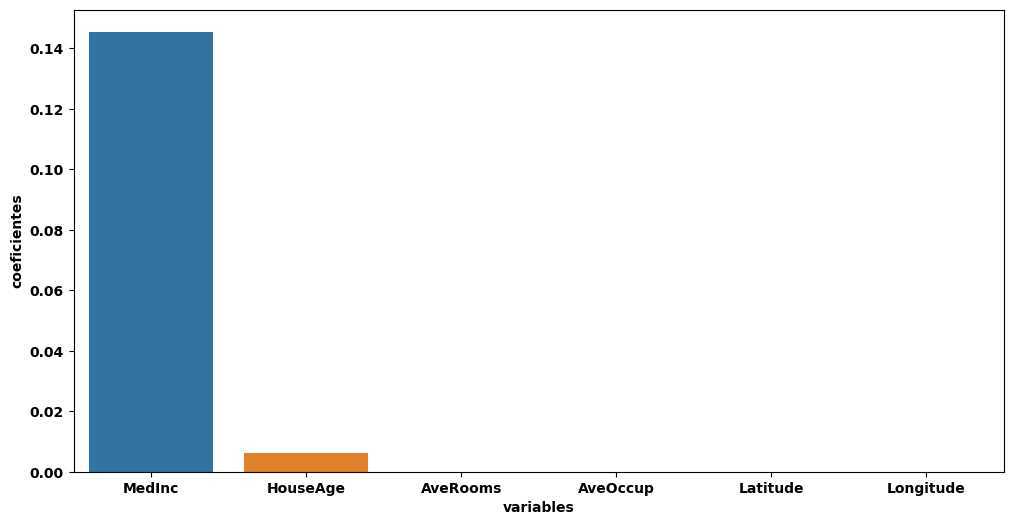

In [ ]:
## Solución
# Ejercicio 11.3.2
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE L1')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(mod_L1_reg.coef_)
print('\n', 'Valor de la intersección o coeficiente "b":')
print(mod_L1_reg.intercept_)



df_coef = pd.DataFrame(X_multiple.columns, columns=['variables'])
df_coef['coeficientes'] = mod_L1_reg.coef_

sns.barplot(x=df_coef['variables'], y=df_coef['coeficientes'])
plt.show()

In [ ]:
## Solución
# Ejercicio 11.3.3
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_l1_mod))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_l1_mod)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_l1_mod))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_l1_mod)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_l1_mod))


Mean Absolute Error: 0.7809877790882953
Mean Absolute Percentage Error: 54.1448522658061
Mean Squared Error: 0.9711898811606068
Root Mean Squared Error: 0.9854896656792534
R^2 coefficient of determination: 0.2849713515307454


Como podemos observar aplicando la regulacion Lasso hace que baje el rendimiento de nuestro modelo,ya que como coge como variables MEDInc y HouseAge hace que disminuya la capacidad de prediccion de nuestro modelo,bajo mi punto de vista podriamos descartar este modelo.

### Elastic Net regression

### **`Ejercicio 11.4`**

Vamos a realizar otro tipo de modelo de regresión:

**`11.4.1`** Construye como ejercicios anteriores en este bloque, un modelo de *Regresión combinando las penalizaciones mediante Elastic Net* para este conjunto de variables de entrada y la variable de salida. (poniendo `alpha=1, l1_ratio=0.2, random_state=100`)
   
**`11.4.2`** Consulta y visualiza y compara como los ejercicios anteriores de este bloque los coeficientes del modelo ajustado.  

**`11.4.3`** Calcula diferentes métricas para evaluar tu modelo y explica si este modelo tiene un rendimiendo aceptable en comparación con los modelos anteriores:  
  
- MAE
- MAPE
- MSE
- RMSE
- $R^2$



In [ ]:
## Solución
# Ejercicio 11.4.1
from sklearn.linear_model import ElasticNet
mod_elastic_reg = ElasticNet(alpha=1, l1_ratio=0.2, random_state=100)
mod_elastic_reg.fit(X_train, y_train)
y_pred_elastic_mod = mod_elastic_reg.predict(X_test)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE Elastic Net 

 Valor de las pendientes o coeficientes "a":
[ 0.30541453  0.0141937   0.         -0.00494798 -0.01015176 -0.        ]

 Valor de la intersección o coeficiente "b":
0.8608029010320182


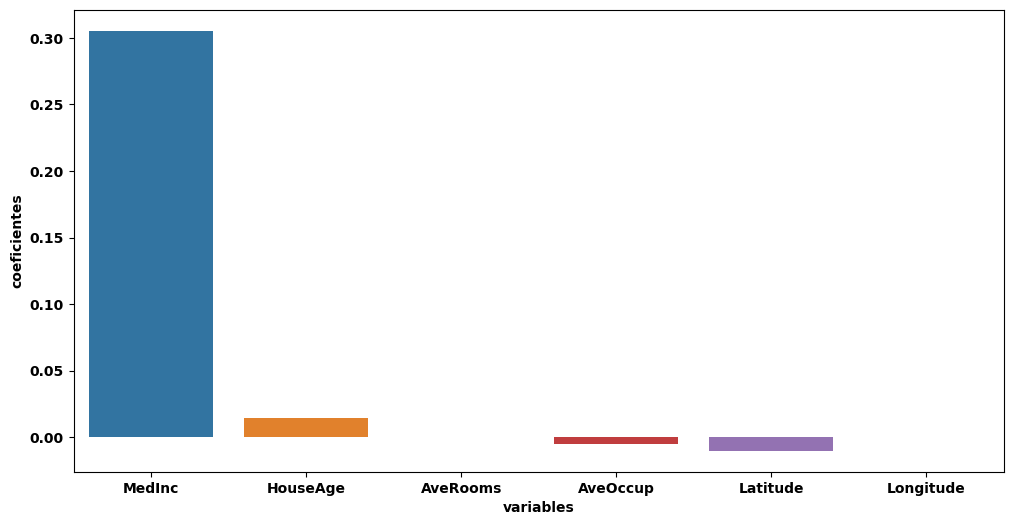

In [ ]:
## Solución
# Ejercicio 11.4.2
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE Elastic Net ')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(mod_elastic_reg.coef_)
print('\n', 'Valor de la intersección o coeficiente "b":')
print(mod_elastic_reg.intercept_)



df_coef = pd.DataFrame(X_multiple.columns, columns=['variables'])
df_coef['coeficientes'] = mod_elastic_reg.coef_

sns.barplot(x=df_coef['variables'], y=df_coef['coeficientes'])
plt.show()

In [ ]:
## Solución
# Ejercicio 11.4.3
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_elastic_mod))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_elastic_mod)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_elastic_mod))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_elastic_mod)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_elastic_mod))

Mean Absolute Error: 0.6530663179105973
Mean Absolute Percentage Error: 43.99309099017151
Mean Squared Error: 0.7129088341675869
Root Mean Squared Error: 0.8443392885372485
R^2 coefficient of determination: 0.4751281391364254


Como podemos observar si combinamos las penalizaciones con el modelo ElasticNet,vemos que,efectivamente,el rendimiento es mejor que el anterior,ya que como usa 4 variables la computacion de nuestro modelo ha bajado considerablemente,sin embargo,su eficiencia es un poco mala,ya que no llega ni al 50% en su R2

### **`Ejercicio 11.5`**

Realiza una busqueda en estos rangos indicados con el método `ElasticNetCV` y resuelve los siguientes puntos:

- $\alpha$:  valores entre `0.6` y `5` con pasos de una centésima.
- $l1_{ratio}$:  valores entre este listado: `[.1, .2, .3, .4, .5, .7, .9, .95, .99, 1]` 
- para `KFold` poner >>> `n_splits=10` y `random_state=111`  
- para `ElasticNetCV` poner >>> `random_state=100`

**`11.5.1`** Entrena un modelo tipo regresión lineal múltiple con los hiperparámetros resultantes y sca las predicciones correspondientes al conjunto de datos de prueba.  

**`11.5.2`** Visualiza los coeficientes del modelo y comparalos con los coeficientes correspondientes al modelo original (primer modelo sin regularización).  

**`11.5.3`** Calcula diferentes métricas para evaluar tu modelo y analiza su rendimiendo en comparación con modelos anteriores.
- MAE
- MAPE
- MSE
- RMSE
- $R^2$  

In [ ]:
## Solución
# Ejercicio 11.5.1
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import KFold
folds= KFold(n_splits=10, shuffle=True, random_state=111)
 
# Train the model
mod_elastic_reg_cv = ElasticNetCV(alphas=np.arange(0.6, 5, 0.01),
                              l1_ratio=[.1, .2, .3, .4, .5, .7, .9,.95,.99,1],
                              cv=folds,
                              random_state=123)
mod_elastic_reg_cv.fit(X_train, y_train)
y_pred_elastic_cv = mod_elastic_reg_cv.predict(X_test)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE Elastic Net 

 Valor de las pendientes o coeficientes "a":
[ 0.3469736   0.01456585 -0.         -0.1368158  -0.10846163 -0.08488422]

 Valor de la intersección o coeficiente "b":
-5.575803801969057


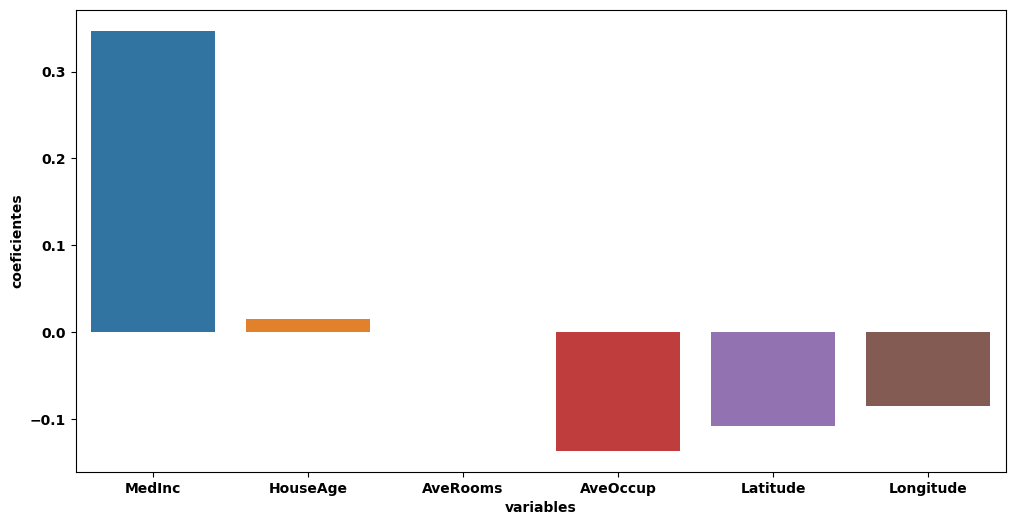

In [ ]:
## Solución
# Ejercicio 11.5.2
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE Elastic Net ')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(mod_elastic_reg_cv.coef_)
print('\n', 'Valor de la intersección o coeficiente "b":')
print(mod_elastic_reg_cv.intercept_)



df_coef = pd.DataFrame(X_multiple.columns, columns=['variables'])
df_coef['coeficientes'] = mod_elastic_reg_cv.coef_

sns.barplot(x=df_coef['variables'], y=df_coef['coeficientes'])
plt.show()

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

 Valor de las pendientes o coeficientes "a":
[ 0.37241128  0.00987665 -0.00790733 -0.38299263 -0.45357548 -0.4377589 ]

 Valor de la intersección o coeficiente "b":
-34.68238577886301


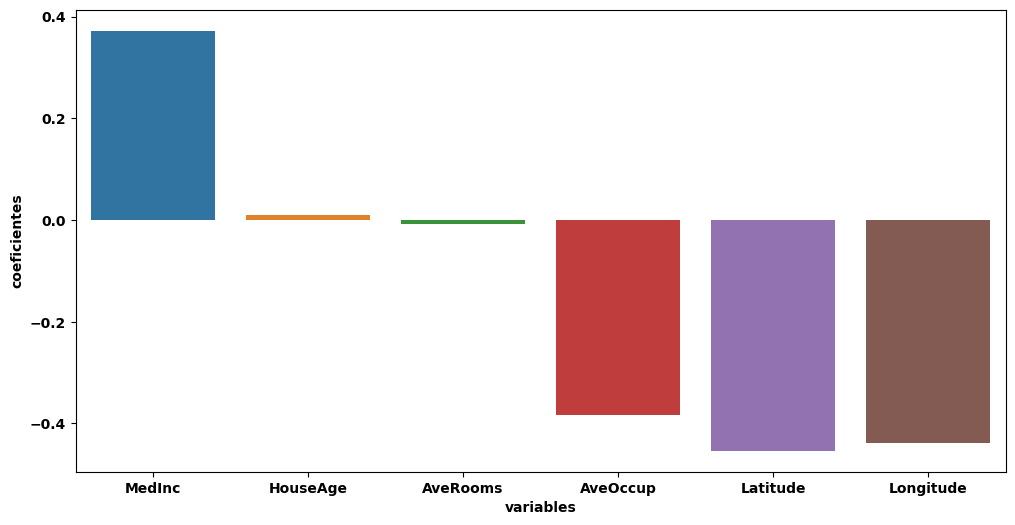

In [ ]:
# Coeficientes del primer modelo sin regularizacion: 
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(mod_lin_reg.coef_)
print('\n', 'Valor de la intersección o coeficiente "b":')
print(mod_lin_reg.intercept_)



df_coef = pd.DataFrame(X_multiple.columns, columns=['variables'])
df_coef['coeficientes'] = mod_lin_reg.coef_

sns.barplot(x=df_coef['variables'], y=df_coef['coeficientes'])
plt.show()

In [ ]:
## Solución
# Ejercicio 11.5.3
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_elastic_cv))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_elastic_cv)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_elastic_cv))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_elastic_cv)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_elastic_cv))

Mean Absolute Error: 0.5780388302835802
Mean Absolute Percentage Error: 37.605997712943484
Mean Squared Error: 0.5859077279260222
Root Mean Squared Error: 0.765446097335418
R^2 coefficient of determination: 0.5686314087972312


Como podemos observar el rendimiento de nuestro modelo ha aumentado,en R2 ya supera el 50%,pero no es suficiente para obtener un modelo optimo,ya que se ha tenido que subir el nivel de computacion.

---

### Decision Trees

### **`Ejercicio 11.6`**

**`11.6.1`** Saca la gráfica de *Model Complexity Curve* que dibuja la evolución de R_cuadrado de training versus del test para el rango de profundidades entre `2` y `20` **no inclusive** indicando `random_state=100.

**`11.6.2`** Realiza una búsqueda del valor de hiperparámetro y el modelo óptimo usando la técnica de *Grid Search* para dicho rango de profundidades y compáralo con el valor sugerido del paso anterior.  
- para `KFold`  >>> `n_splits=10` y `random_state=111`  
- para `GridSearchCV`  >>> `random_state=100`  

**`11.6.3`** Calcula diferentes métricas para evaluar tu modelo y analiza su rendimiendo en comparación con modelos anteriores.
- MAE
- MAPE
- MSE
- RMSE
- $R^2$    

**`11.6.4`** Define una función que coja la profundidad máxima para un árbol y dibuje el *Learning Curve* que visualiza la evolución del rendimiento del modelo tanto en training como en test, en función del tamaño de subconjuntos de datos de entrenamiento que se aumentan desde `20` puntos **de 10 en 10** hasta considerar todos los datos de training.

**`11.6.5`** Saca la gráfica de el *Learning Curve* para el modelo óptimo, usando la función definida en el paso anterior y explica si este modelo tiene preferencia o no, comparando con modelos anteriores.

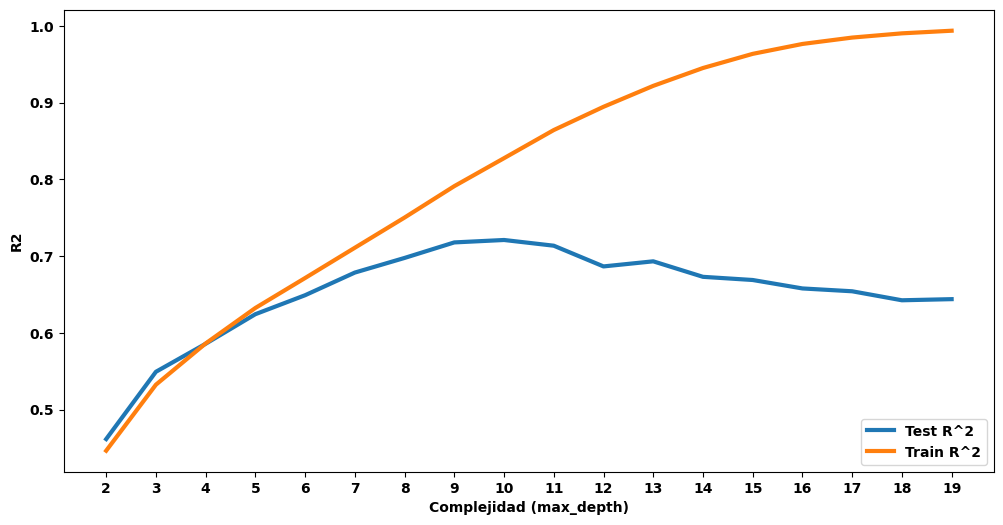

In [ ]:
## Solución
# Ejercicio 11.6.1
from sklearn.tree import DecisionTreeRegressor 
# Consideramos un rango para asignar el hiperparámetro 
hiper_param = np.arange(2,20)  

# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los árboles
train_r2 = np.zeros(hiper_param.size) 
test_r2 = np.zeros(hiper_param.size) 
for i in range(hiper_param.size):
    # Generamos un árbol para cada hiperparámetro, lo entrenamos y calculamos el R_cuadrado sobre datos de train y de test 
    mod_tree = DecisionTreeRegressor(max_depth=hiper_param[i], random_state=100)
    mod_tree.fit(X_train, y_train)
    train_r2[i] = r2_score(y_train, mod_tree.predict(X_train)) 
    test_r2[i] = r2_score(y_test, mod_tree.predict(X_test))    
# Graficamos el R_cuadrado de training versus de test
plt.plot(hiper_param, test_r2, linewidth=3, label='Test R^2')
plt.plot(hiper_param, train_r2, linewidth=3, label='Train R^2')
plt.xticks(hiper_param)
plt.xlabel('Complejidad (max_depth)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
## Solución
# Ejercicio 11.6.2
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Definimos la menra de trozear dataset de train para crear los subconjuntos que se utilizan en la validación cruzada (Cross-Validation)
folds = KFold(n_splits=10, shuffle=True, random_state=111) 

# Declaramos el tipo de regresor (modelo) y los rangos de hiperparámetros a considerar en la búsqueda
modelo = DecisionTreeRegressor(random_state=100)
parametros = {"max_depth":list(range(2,20))} 

# Establecer el R_cuadrado como la función de "scoring" a la hora de puntuar los modelos
scoreFun = make_scorer(r2_score)   

# Definir el Grid Search y realizar la búsqueda con los datos de entrenamiento
modelo_grid = GridSearchCV(estimator=modelo,
                          param_grid=parametros,
                          scoring=scoreFun,
                          cv=folds)  
modelo_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=111, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=100),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19]},
             scoring=make_scorer(r2_score))

In [ ]:
modelo_grid.best_estimator_

DecisionTreeRegressor(max_depth=9, random_state=100)

In [ ]:
y_pred_grid_cv=modelo_grid.best_estimator_.predict(X_test)

In [ ]:
## Solución
# Ejercicio 11.6.3
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_grid_cv))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_grid_cv)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_grid_cv))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_grid_cv)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_grid_cv))

Mean Absolute Error: 0.4177865134351003
Mean Absolute Percentage Error: 24.299386558778192
Mean Squared Error: 0.3832540620168775
Root Mean Squared Error: 0.6190751666937364
R^2 coefficient of determination: 0.7178331042156298


Como podemos observar,nuestro modelo es un poco mejor a los anteriores,ya que si miramos las metricas,R2 ya supera el 70%.

In [ ]:
## Solución
# Ejercicio 11.6.4
def curva_aprendizaje(profundidad: int):
    """Función para sacar la gráfica de Learning Curve a partir de la profundidad del árbol"""

    # Generar la estructura del árbol
    hiper_parametro = int(profundidad)   
    modelo_tree = DecisionTreeRegressor(max_depth=hiper_parametro, random_state=100)
    
    # Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
    num_samples = np.linspace(20,X_train.shape[0]+1,10).astype(int)

    # Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los árboles
    train_R2 = np.zeros(num_samples.size) 
    test_R2 = np.zeros(num_samples.size)


    for i in range(num_samples.size):
        # Generamos un árbol para cada subconjunto de datos de entrenamiento y lo ajustamos  
        modelo_tree.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        # Calculamos el R_cuadrado sobre datos de train y de test
        train_R2[i] = r2_score(y_train[:num_samples[i]], modelo_tree.predict(X_train[:num_samples[i]])) 
        test_R2[i] = r2_score(y_test, modelo_tree.predict(X_test))

    # Graficamos el R_cuadrado de training versus de test
    plt.plot(num_samples, test_R2, label = 'Test R^2')
    plt.plot(num_samples, train_R2, label = 'Train R^2')
    plt.title('Curva de aprendizaje (Learning Curve) para la profundidad = %s' % hiper_parametro)
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('R2')
    plt.legend(loc = 'lower right')
    plt.show()  

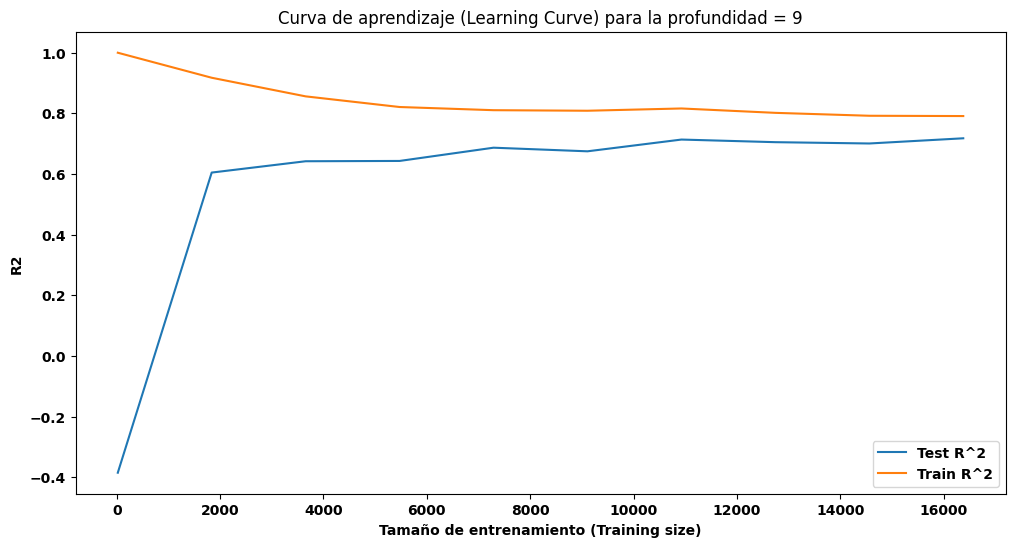

In [ ]:
## Solución
# Ejercicio 11.6.5
curva_aprendizaje(9)

Yo pienso que este modelo si podria tener preferencia frente a modelos anteriores,ya que el R2 ha empezado a estar por encima del 70%,y si vemos en la grafica de la curva de aprendizaje podemos descartar el problema de overfitting.

---

#### Random Forest

### **`Ejercicio 11.7`**

**`11.7.1`** Saca la gráfica de *Model Complexity Curve* que dibuja la evolución de R_cuadrado de training, test y OOB para el rango de tamaño del bosque entre `10` y `300` **inclusive** con pasos de `10` (poniendo `random_state=100`).  

**`11.7.2`** Saca la gráfica de *Model Complexity Curve* que dibuja la evolución de R_cuadrado de training, test y OOB para el rango de profundidades de los árboles del bosque entre `2` y `40` **inclusive** considerando el número óptimo de los árboles estimado en el paso anterior (poniendo `random_state=100`). 

**`11.7.3`** Saca la gráfica de *Model Complexity Curve* que dibuja la evolución de R_cuadrado de training, test y OOB para diferentes números de predictores considerados en cada bifurcación de los árboles, considerando el número óptimo de los árboles estimado y la profundidad máxima estimada en los puntos anteriores (poniendo `random_state=100`). 

**`11.7.4`** Para el modelo con los hiperparámetros óptimos que se intuyen de los pasos anteriores, Calcula diferentes métricas para evaluarlo y analiza su rendimiendo en comparación con otros modelos desarrollados anteriormente.
- MAE  
- MAPE  
- MSE  
- RMSE  
- $R^2$  
- OOB $R^2$  
    
**`11.7.5`** Visualiza los resultados de este último modelo mediante la gráfica de *"Valores reales vs. predichos"* para el conjunto de test. 

**`11.7.6`** Saca la gráfica del *Learning Curve* para el modelo estimado, definiendo y aplicando una función nueva al respecto y explica si este modelo tiene un buen rendimiento comparando con modelos anteriores.

**`11.7.7`** Para los rangos indicados, realiza una búsqueda del modelo óptimo usando la técnica de *Grid Search* de *`5-fold-CV`*.
-             parametros={'n_estimators': [100, 110, 120, 130, 140, 150],
                          'max_depth': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
                          'max_features': [2, 3, 4, 5, 6]}
- para `KFold`  >>> `n_splits=5` y `random_state=111`  
- para `GridSearchCV`  >>> `random_state=100` 

**`11.7.8`** Calcula diferentes métricas para evaluar el modelo óptimo según la busqueda de *Grid Search* y analiza su rendimiendo en comparación con modelos anteriores.  
- MAE  
- MAPE  
- MSE  
- RMSE  
- $R^2$     

**`11.7.9`** Saca la gráfica del *Learning Curve* para el modelo óptimo, aplicando la función definida en los pasos anteriores y explica si este modelo tiene preferencia comparando con modelos anteriores.


c:\Users\wonderwoman\anaconda3\envs\recomendadorVideos\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\wonderwoman\anaconda3\envs\recomendadorVideos\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


El mejor valor de n_estimator podría ser = 290  que consigue un R2 = 0.8270287255422352


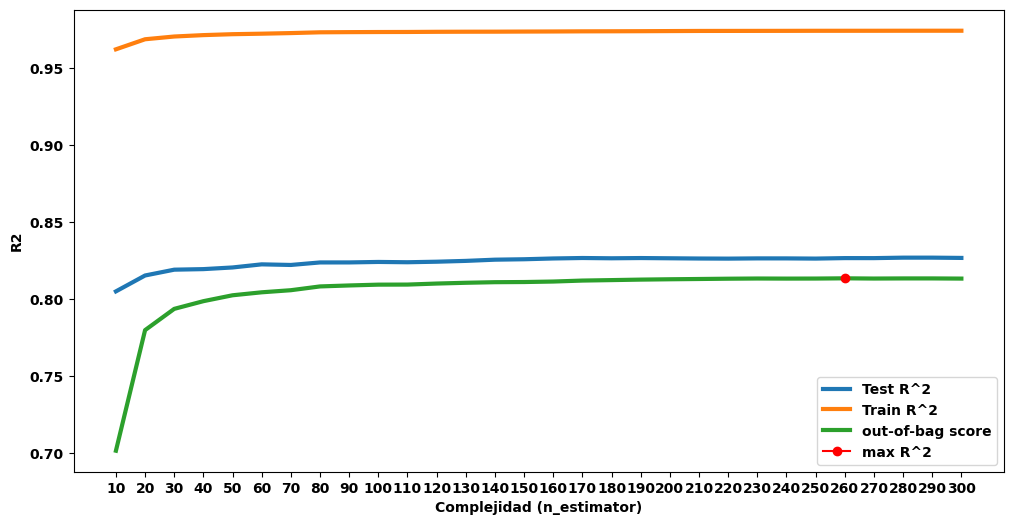

In [ ]:
## Solución
# Ejercicio 11.7.1
from sklearn.ensemble import RandomForestRegressor

# Consideramos un rango para asignar el hiperparámetro 
hiper_param = np.arange(10,301,10)
    
# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los árboles
train_r2 = np.zeros(hiper_param.size) 
test_r2 = np.zeros(hiper_param.size) 
oob_score = np.zeros(hiper_param.size)

for i in range(hiper_param.size):
    # Generamos un árbol para cada hiperparámetro, lo entrenamos y calculamos el R_cuadrado sobre datos de train y de test 
    mod_tree = RandomForestRegressor(n_estimators=hiper_param[i],
                                       n_jobs=-1,
                                       oob_score=True,
                                       random_state=100)
    mod_tree.fit(X_train, y_train)
    train_r2[i] = r2_score(y_train, mod_tree.predict(X_train)) 
    test_r2[i] = r2_score(y_test, mod_tree.predict(X_test)) 
    oob_score[i] = mod_tree.oob_score_
print("El mejor valor de n_estimator podría ser =", hiper_param[np.argmax(test_r2)],
      " que consigue un R2 =", max(test_r2))

# Graficamos el R_cuadrado de training versus de test
plt.plot(hiper_param, test_r2, linewidth=3, label='Test R^2')
plt.plot(hiper_param, train_r2, linewidth=3, label='Train R^2')
plt.plot(hiper_param, oob_score, linewidth=3, label='out-of-bag score')
plt.plot(hiper_param[np.argmax(oob_score)], max(oob_score),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (n_estimator)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()

El mejor valor de max_depth podría ser = 31  que consigue un R2 = 0.8272975220000935


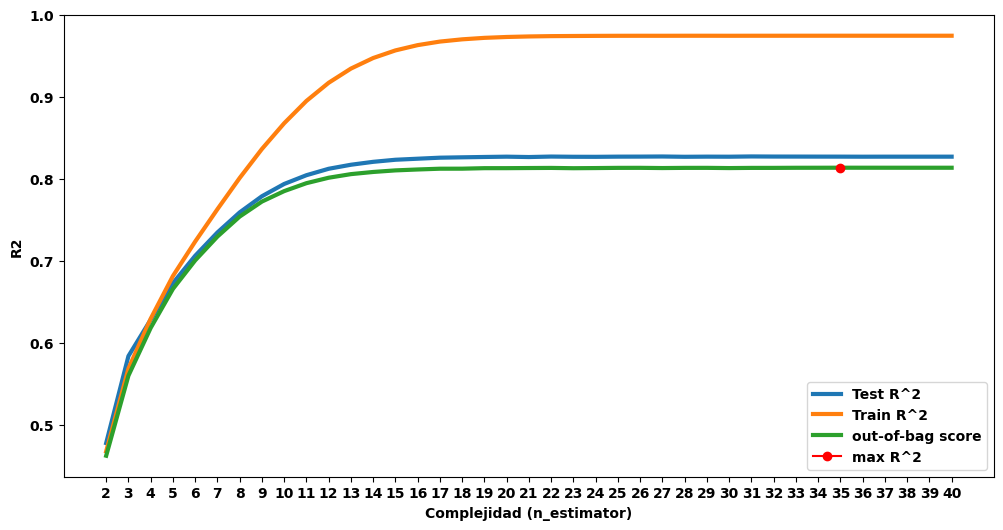

In [ ]:
## Solución
# Ejercicio 11.7.2
from sklearn.ensemble import RandomForestRegressor

# Consideramos un rango para asignar el hiperparámetro 
hiper_param = np.arange(2,41,1)
    
    
# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los árboles
train_r2 = np.zeros(hiper_param.size) 
test_r2 = np.zeros(hiper_param.size) 
oob_score = np.zeros(hiper_param.size)

for i in range(hiper_param.size):
    # Generamos un árbol para cada hiperparámetro, lo entrenamos y calculamos el R_cuadrado sobre datos de train y de test 
    mod_tree = RandomForestRegressor(n_estimators=290,
                                       n_jobs=-1,
                                       oob_score=True,
                                       max_depth=hiper_param[i],
                                       random_state=100)
    mod_tree.fit(X_train, y_train)
    train_r2[i] = r2_score(y_train, mod_tree.predict(X_train)) 
    test_r2[i] = r2_score(y_test, mod_tree.predict(X_test)) 
    oob_score[i] = mod_tree.oob_score_
print("El mejor valor de max_depth podría ser =", hiper_param[np.argmax(test_r2)],
      " que consigue un R2 =", max(test_r2))

# Graficamos el R_cuadrado de training versus de test
plt.plot(hiper_param, test_r2, linewidth=3, label='Test R^2')
plt.plot(hiper_param, train_r2, linewidth=3, label='Train R^2')
plt.plot(hiper_param, oob_score, linewidth=3, label='out-of-bag score')
plt.plot(hiper_param[np.argmax(oob_score)], max(oob_score),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (n_estimator)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()

El mejor valor de max_features podría ser = 2  que consigue un R2 = 0.8287597345016218


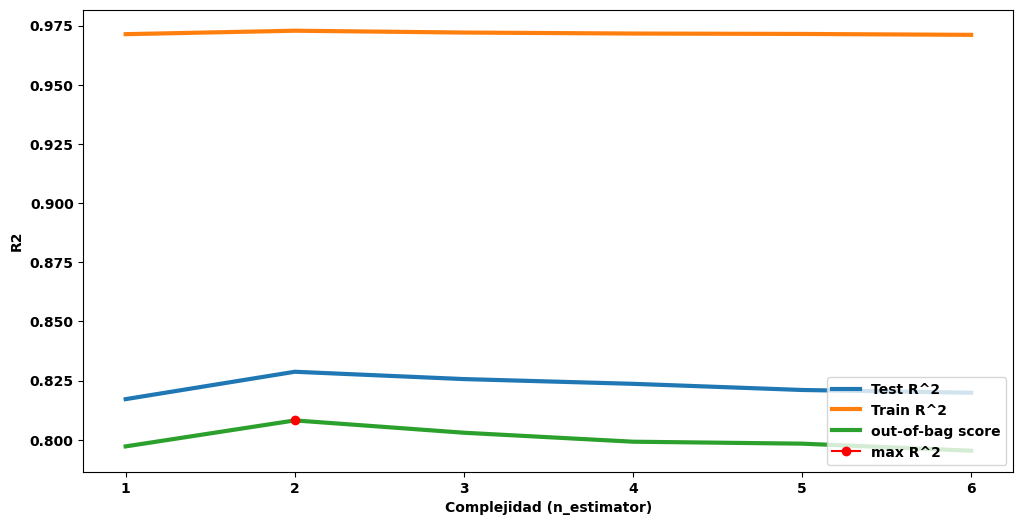

In [ ]:
## Solución
# Ejercicio 11.7.3
from sklearn.ensemble import RandomForestRegressor

# Consideramos un rango para asignar el hiperparámetro 
hiper_param = np.arange(1, X_train.shape[1] + 1, 1)
    
# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los árboles
train_r2 = np.zeros(hiper_param.size) 
test_r2 = np.zeros(hiper_param.size) 
oob_score = np.zeros(hiper_param.size)

for i in range(hiper_param.size):
    # Generamos un árbol para cada hiperparámetro, lo entrenamos y calculamos el R_cuadrado sobre datos de train y de test 
    mod_tree = RandomForestRegressor(n_estimators=33,
                                       n_jobs=-1,
                                       max_depth=31,
                                       oob_score=True,
                                       random_state=100,
                                       max_features=hiper_param[i])
    mod_tree.fit(X_train, y_train)
    train_r2[i] = r2_score(y_train, mod_tree.predict(X_train)) 
    test_r2[i] = r2_score(y_test, mod_tree.predict(X_test)) 
    oob_score[i] = mod_tree.oob_score_
print("El mejor valor de max_features podría ser =", hiper_param[np.argmax(test_r2)],
      " que consigue un R2 =", max(test_r2))

# Graficamos el R_cuadrado de training versus de test
plt.plot(hiper_param, test_r2, linewidth=3, label='Test R^2')
plt.plot(hiper_param, train_r2, linewidth=3, label='Train R^2')
plt.plot(hiper_param, oob_score, linewidth=3, label='out-of-bag score')
plt.plot(hiper_param[np.argmax(oob_score)], max(oob_score),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (n_estimator)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
## Solución
# Ejercicio 11.7.4
mod_tree_best = RandomForestRegressor(n_estimators=290,
                                       n_jobs=-1,
                                       max_depth=31,
                                       oob_score=True,
                                       random_state=100,
                                       max_features=2)
mod_tree_best.fit(X_train, y_train)
y_pred_tree_best=mod_tree_best.predict(X_test)

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_tree_best))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_tree_best)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_tree_best))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_tree_best)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_tree_best))
print('R^2 of OOB:', mod_tree_best.oob_score_)

Mean Absolute Error: 0.30454204331547396
Mean Absolute Percentage Error: 17.294732924610763
Mean Squared Error: 0.2207963682843115
Root Mean Squared Error: 0.46988974056081656
R^2 coefficient of determination: 0.837440924927488
R^2 of OOB: 0.8265703297500392


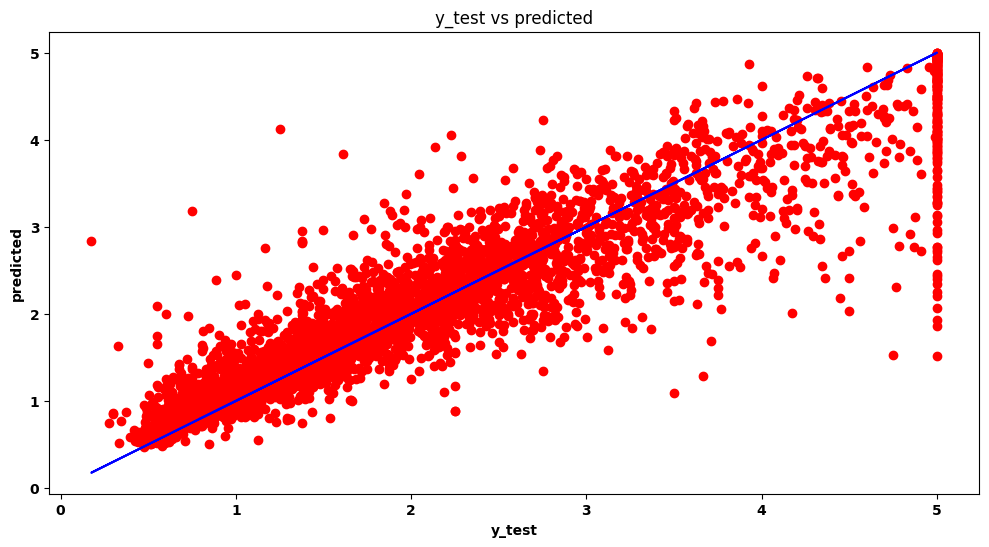

In [ ]:
## Solución
# Ejercicio 11.7.5
plt.scatter(y_test, y_pred_tree_best, color = 'red')
plt.plot(y_test, y_test, color = 'blue')
plt.title('y_test vs predicted')
plt.xlabel('y_test')
plt.ylabel('predicted')
plt.show()

In [ ]:
## Solución
# Ejercicio 11.7.6
# Definimos una función que toma el valor de los hiperparámetros y 
# dibuja la evolución del rendimiento del modelo para el conjunto de training y de test: 
def curva_aprendizaje_rf(n_arboles: int,
                         profundidad: int,
                         n_var: int):
    """Función para sacar la gráfica de Learning Curve a partir de los hiperparámetros del bosque"""

    # Generar la estructura del modelo
    mod_tree = RandomForestRegressor(n_estimators=int(n_arboles),
                                          max_depth=int(profundidad),
                                          max_features=int(n_var),
                                          oob_score=True,
                                          n_jobs=-1,
                                          random_state=77)
    
    # Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
    num_samples = np.linspace(20,X_train.shape[0]).astype(int)

    # Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los modelos
    train_R2 = np.zeros(num_samples.size) 
    test_R2 = np.zeros(num_samples.size)
    oob_score = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        # Generamos un modelo para cada subconjunto de datos de entrenamiento y lo ajustamos  
        mod_tree.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        # Calculamos el R_cuadrado sobre datos de train y de test
        train_R2[i] = r2_score(y_train[:num_samples[i]], mod_tree.predict(X_train[:num_samples[i]])) 
        test_R2[i] = r2_score(y_test, mod_tree.predict(X_test))
        oob_score[i] = mod_tree.oob_score_

    print("La diferencia de R^2 entre training y OOB es= ", train_R2[-1]-oob_score[-1])

    # Graficamos el R_cuadrado de training versus de test
    fig = plt.figure(figsize=(20,7))
    plt.plot(num_samples, test_R2, label = 'Test R^2')
    plt.plot(num_samples, train_R2, label = 'Train R^2')
    plt.plot(num_samples, oob_score, label = 'OOB R^2')
    plt.title('Curva de aprendizaje (Learning Curve) para max_features = %s' % n_var)
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('R2')
    plt.legend(loc = 'lower right')
    plt.show()  

La diferencia de R^2 entre training y OOB es=  0.1505852401877218


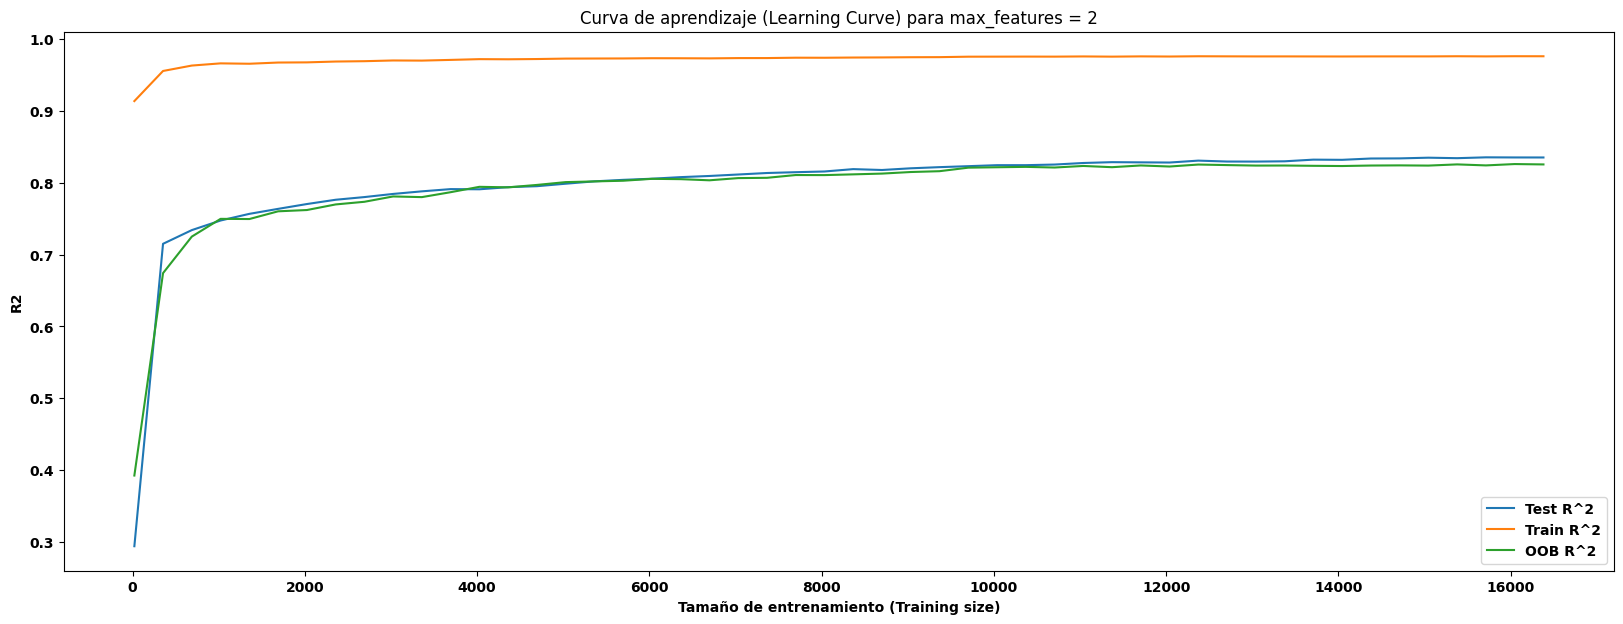

In [ ]:
curva_aprendizaje_rf(290,31,2)

In [ ]:
## Solución
# Ejercicio 11.7.7
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


# Definimos la menra de trozear dataset de train para crear los subconjuntos que se utilizan en la validación cruzada (Cross-Validation)
folds = KFold(n_splits=5, shuffle=True, random_state=111) 

# Declaramos el tipo de regresor (modelo) y los rangos de hiperparámetros a considerar en la búsqueda
modelo = RandomForestRegressor(random_state=100)
parametros={'n_estimators': [100, 110, 120, 130, 140, 150],
                          'max_depth': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
                          'max_features': [2, 3, 4, 5, 6]}
# Establecer el R_cuadrado como la función de "scoring" a la hora de puntuar los modelos
scoreFun = make_scorer(r2_score)   

# Definir el Grid Search y realizar la búsqueda con los datos de entrenamiento
modelo_grid_cv = GridSearchCV(estimator=modelo,
                          param_grid=parametros,
                          scoring=scoreFun,
                          cv=folds,
                          n_jobs=-1)  


modelo_grid_cv.fit(X_train, y_train)

In [ ]:
modelo_grid_cv.best_estimator_
modelo_optimo=RandomForestRegressor(max_depth=25, max_features=2, random_state=100)
modelo_optimo.fit(X_train,y_train)
y_pred_grid_cv=modelo_optimo.predict(X_test)

In [ ]:
## Solución
# Ejercicio 11.7.8
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_grid_cv))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_grid_cv)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_grid_cv))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_grid_cv)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_grid_cv))
print('R^2 of OOB:', modelo_optimo.oob_score_)

In [ ]:
## Solución
# Ejercicio 11.7.9
modelo_grid.best_estimator_

In [ ]:
curva_aprendizaje_rf(290,31,2)

---

### Neural Networks

### **`Ejercicio 11.8`**

Vamos a realizar otro tipo de modelo de regresión:

**`11.8.1`** Construye como ejercicios anteriores en este bloque, un modelo de *Regresión con Redes Neuronales* para este conjunto de variables de entrada y la variable de salida (poniendo `random_state=100`) y después calcula diferentes métricas para evaluar este modelo y explica si tiene un rendimiendo aceptable en comparación con los modelos anteriores:  
  
- MAE
- MAPE
- MSE
- RMSE
- $R^2$

**`11.8.2`** Construye otro modelo indicando estos hiperparámetros:
- hidden_layer_sizes=(21,21),
- activation='tanh',
- solver='lbfgs',
- max_iter=10000,
- alpha=1e-5,
- tol=1e-5,
- random_state=100

y compara el rendimiento de este nuevo modelo con el resto de los modelos anteriores.

**`11.8.3`** Define una nueva función para sacar la gráfica del *Learning Curve* para las redes neuronales y aplícala para comparar los dos modelos anteriores.


**`11.8.4`** Para los rangos indicados, realiza una búsqueda del modelo óptimo usando la técnica de *Grid Search* introduciendo:

-             parametros={"activation": ['relu', 'tanh', 'logistic'], 
                          "solver": ['adam', 'lbfgs', 'sgd'],
                          "hidden_layer_sizes": list(itertools.product([5,10,20], repeat=3))} 

- para `KFold`  >>> `n_splits=5` y `random_state=111`  
- para `GridSearchCV`  >>> `random_state=100` 


**`11.8.5`** Calcula diferentes métricas para evaluar el modelo óptimo, saca su gráfica de *Learning Curve* explica si este modelo tiene un rendimiendo aceptable en comparación con los modelos anteriores y finalmente a qué modelo escogerías para ser usado como un predictor de precios de viviendas en California.

In [ ]:
## Solución
# Ejercicio 11.8.1
from sklearn.neural_network import MLPRegressor

red_neuronal = MLPRegressor(random_state=100)

red_neuronal.fit(X_train, y_train)

y_pred = red_neuronal.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred))


Como podemos observar en las metricas,obtenemos mejores resultados que con modelos anteriores,ya que el R2 es mas alto.

In [ ]:
## Solución
# Ejercicio 11.8.2
red_b = MLPRegressor( hidden_layer_sizes=(21,21),
activation='tanh',
solver='lbfgs',
max_iter=10000,
alpha=1e-5,
tol=1e-5,
random_state=100)
                     
red_b.fit(X_train, y_train)

y_pred_b = red_b.predict(X_test)

In [ ]:
## Solución
# Ejercicio 11.8.3
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def curva_aprendizaje_red1024(capas_ocultas: tuple=(100,),
                         funcion_activacion: str='relu',
                         optimizador: str='adam'):
    """Función para sacar la gráfica de Learning Curve a partir de los hiperparámetros de la red neuronal"""

    # Generar la estructura del modelo
    modelo_red = MLPRegressor(hidden_layer_sizes=capas_ocultas,
                              activation=funcion_activacion,
                              solver=optimizador,
                              random_state=123)
    # Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
    num_samples = np.linspace(10,X_train.shape[0]).astype(int)

    # Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los modelos
    train_R2 = np.zeros(num_samples.size) 
    test_R2 = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        # Generamos un modelo para cada subconjunto de datos de entrenamiento y lo ajustamos  
        modelo_red.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        # Calculamos el R_cuadrado sobre datos de train y de test
        train_R2[i] = r2_score(y_train[:num_samples[i]], modelo_red.predict(X_train[:num_samples[i]])) 
        test_R2[i] = r2_score(y_test, modelo_red.predict(X_test))

    print("La diferencia de R^2 entre training y test es= ", train_R2[-1]-test_R2[-1])

    # Graficamos el R_cuadrado de training versus de test
    fig = plt.figure(figsize=(20,7))
    plt.plot(num_samples, test_R2, label = 'Test R^2')
    plt.plot(num_samples, train_R2, label = 'Train R^2')
    plt.title('Curva de aprendizaje (Learning Curve) de la red neuronal')
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('R2')
    plt.legend(loc = 'lower right')
    plt.show()

In [ ]:
curva_aprendizaje_red1024()

c:\Users\wonderwoman\anaconda3\envs\recomendadorVideos\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\wonderwoman\anaconda3\envs\recomendadorVideos\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\wonderwoman\anaconda3\envs\recomendadorVideos\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
## Solución
# Ejercicio 11.8.4
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
import itertools
# Definimos la menra de trozear dataset de train para crear los subconjuntos que se utilizan en la validación cruzada (Cross-Validation)
folds = KFold(n_splits=5, shuffle=True, random_state=111) 

# Declaramos el tipo de regresor (modelo) y los rangos de hiperparámetros a considerar en la búsqueda
modelo =MLPRegressor(random_state=100)
parametros={"activation": ['relu', 'tanh', 'logistic'], 
                          "solver": ['adam', 'lbfgs', 'sgd'],
                          "hidden_layer_sizes": list(itertools.product([5,10,20], repeat=3))} 
# Establecer el R_cuadrado como la función de "scoring" a la hora de puntuar los modelos
scoreFun = make_scorer(r2_score)   

# Definir el Grid Search y realizar la búsqueda con los datos de entrenamiento
modelo_grid = GridSearchCV(estimator=modelo,
                          param_grid=parametros,
                          scoring=scoreFun,
                          cv=folds,
                          n_jobs=-1)  
modelo_grid.fit(X_train, y_train)

y_pred_grid_nn=modelo_grid.best_estimator_.predict(X_test)

In [ ]:
## Solución
# Ejercicio 11.8.5
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_grid_nn))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_grid_nn)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_grid_nn))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_grid_nn)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_grid_nn))
print('R^2 of OOB:', modelo_grid.oob_score_)

Yo personalmente usaria el modelo construido con redes neuronales ya que a mi parecer,es mas eficiente y proporciona un rendimiento superior a los demas,ademas que las metricas que obtenemos son superiores a los demas modelos